In [60]:
!pip install autoviz

In [45]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('/content/Hospital_Adm_Records')
df.head()

,Unnamed: 0,P_ID,P_Age,Gender,Bed_No,Pre-existing Conditions,Condition Severity,Disease type,Admission_ID,Admission_Date,Admission_Type,Department,Treatment_Start_Date,Treatment_End_Date,Bed_Release_Date,Recovery_Time,Bed_Allocation_Date
0,0,7001234,18,Male,421,NaN,Mild,Normal,ABCD1234,2020-01-01,Emergency,General Surgery,2020-01-02,2020-01-07,2020-01-07,6,NaN
1,1,7005678,15,Female,468,Diabetes,Moderate,ICU,EFGH5678,2020-02-15,Scheduled,Neurology,2020-02-16,2020-02-23,2020-02-23,8,NaN
2,2,7009012,12,Male,492,Hypertension,Severe,Highly communicable,IJKL9012,2020-03-20,Emergency,Cardiology,2020-03-21,2020-04-05,2020-04-05,16,NaN
3,3,7012345,19,Female,435,Depression,Mild,Normal,MNOP2345,2020-04-10,Scheduled,General Surgery,2020-04-11,2020-04-16,2020-04-16,6,NaN
4,4,7012346,17,Male,408,NaN,Moderate,ICU,PQRS2346,2020-05-15,Emergency,Neurology,2020-05-16,2020-05-23,2020-05-23,8,NaN


In [12]:
df.dtypes

,0
Unnamed: 0,int64
P_ID,int64
P_Age,int64
Gender,object
Bed_No,int64
Pre-existing Conditions,object
Condition Severity,object
Disease type,object
Admission_ID,object
Admission_Date,object


In [13]:
df.columns

Index(['Unnamed: 0', 'P_ID', 'P_Age', 'Gender', 'Bed_No',
       'Pre-existing Conditions', 'Condition Severity', 'Disease type',
       'Admission_ID', 'Admission_Date', 'Admission_Type', 'Department',
       'Treatment_Start_Date', 'Treatment_End_Date', 'Bed_Release_Date',
       'Recovery_Time', 'Bed_Allocation_Date'],
      dtype='object')

In [14]:
df.shape

(1189, 17)

### Dataset details
*   Rows: 1189
*   Columns: 17

In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
P_ID,0
P_Age,0
Gender,0
Bed_No,0
Pre-existing Conditions,193
Condition Severity,7
Disease type,0
Admission_ID,0
Admission_Date,0


### About Dataset

1. P_ID: Unique 7-digit ID starting with the digit 7,
allotted to each patient for identification.
2. P_Age: Patient ages, ranging between 30 and 40 years.
3. Gender: The gender of the patient, recorded as either Male or Female.
4. Bed_No: Unique bed number assigned to each patient, ranging between 1 and 500.
5. Pre-existing Conditions: Information on any prior medical conditions or history that the patient has.
6. Condition Severity: The severity of the patient’s condition, categorized as Mild, Moderate, or Severe.
7. Disease type: Classification of the disease type, whether it is Highly communicable, ICU-related, or Normal.
8. Admission_ID: A unique identifier for each admission, which includes both numbers and alphabets.
9. Admission_Date: The date when the patient was admitted and the bed was allocated.
10. Admission_Type: Specifies the nature of the admission, such as emergency or scheduled.
11. Department: The department in which the patient is being treated, such as General Surgery, Neurology, or Cardiology.
12. Treatment_Start_Date: The date when the patient’s treatment begins, which occurs after bed allocation (between 2020-2023).
13. Treatment_End_Date: The date when the patient’s treatment ends, varying based on disease type.
14. Bed_Allocation_Date: The date when the bed was allocated to the patient, which is the same as the admission date.
15. Bed_Release_Date: The date when the bed is vacated, corresponding with the treatment end date.
16. Recovery_Time: The number of days between bed allocation and release, indicating the total recovery duration.

### **Pre-Processing**

In [47]:
#Dropping columns
df.drop(['Unnamed: 0','Admission_Date', 'Bed_No', 'Bed_Release_Date','Treatment_Start_Date','Treatment_End_Date','Bed_Allocation_Date', 'P_ID','Admission_ID'], axis=1, inplace=True)
df.head()

,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,18,Male,NaN,Mild,Normal,Emergency,General Surgery,6
1,15,Female,Diabetes,Moderate,ICU,Scheduled,Neurology,8
2,12,Male,Hypertension,Severe,Highly communicable,Emergency,Cardiology,16
3,19,Female,Depression,Mild,Normal,Scheduled,General Surgery,6
4,17,Male,NaN,Moderate,ICU,Emergency,Neurology,8


In [48]:
#People who don't have any prior medical history
df['Pre-existing Conditions'].isna().sum()

193

In [20]:
df.isna().sum()

,0
P_Age,0
Gender,0
Pre-existing Conditions,193
Condition Severity,7
Disease type,0
Admission_Type,0
Department,0
Recovery_Time,0


In [49]:
#Encoding the column- based on Number of Disease
def encode_existing(x):
    dis = ['hypertension', 'diabetes', 'depression']
    for i in range(len(x)):
        if type(x[i]) == float:
            x[i] = 0
            continue
        c = 0
        for j in dis:
            if j in x[i].lower():
                c += 1
        x[i] = c
    x = x.astype(int)
    return x
df['Pre-existing Conditions'] = encode_existing(df['Pre-existing Conditions'])

In [44]:
df.head()

,Unnamed: 0,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,0,18,Male,0,Mild,Normal,Emergency,General Surgery,6
1,1,15,Female,1,Moderate,ICU,Scheduled,Neurology,8
2,2,12,Male,1,Severe,Highly communicable,Emergency,Cardiology,16
3,3,19,Female,1,Mild,Normal,Scheduled,General Surgery,6
4,4,17,Male,0,Moderate,ICU,Emergency,Neurology,8


In [80]:
df['Admission_Type'].value_counts()

,count
Admission_Type,
Scheduled,508
Emergency,456
emergency,156
scheduled,69


In [81]:
df['Admission_Type'] = df['Admission_Type'].str.lower()
df['Admission_Type'].value_counts()

,count
Admission_Type,
emergency,612
scheduled,577


In [83]:
df['Department'].value_counts()

,count
Department,
General Surgery,568
Cardiology,426
Neurology,195


In [84]:
df['Disease type'].value_counts()

,count
Disease type,
Normal,822
ICU,239
Highly communicable,128


### **EDA**

In [50]:
df.head()

,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,18,Male,0,Mild,Normal,Emergency,General Surgery,6
1,15,Female,1,Moderate,ICU,Scheduled,Neurology,8
2,12,Male,1,Severe,Highly communicable,Emergency,Cardiology,16
3,19,Female,1,Mild,Normal,Scheduled,General Surgery,6
4,17,Male,0,Moderate,ICU,Emergency,Neurology,8


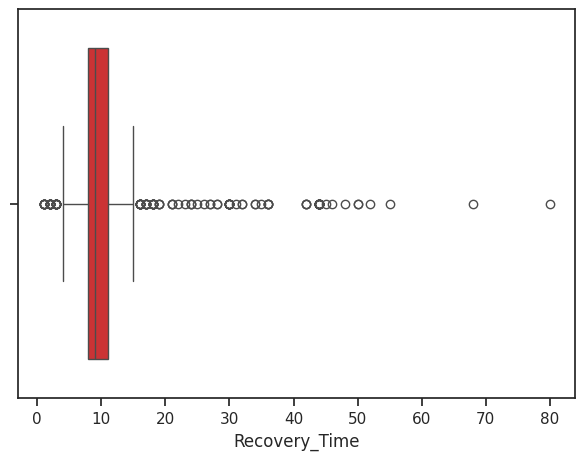

In [67]:
#checking outliers in Target Column
sns.boxplot(x='Recovery_Time', data=df)
plt.show()

*   Outliers presence in Target Column.


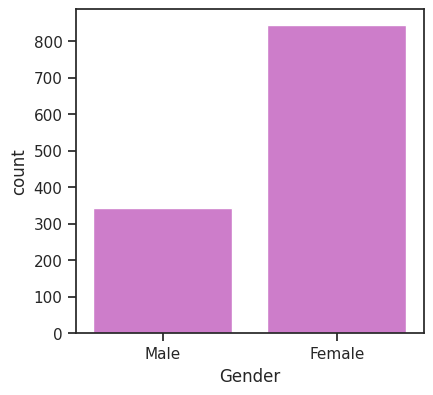

In [71]:
#Distribution of Gender
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data=df, color='orchid')
plt.show()

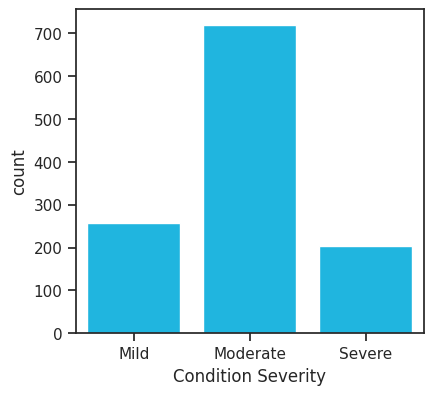

In [77]:
# Condition Severity of Patients
plt.figure(figsize=(4,4))
sns.countplot(x='Condition Severity', data=df, color='#00c7ff')
plt.show()

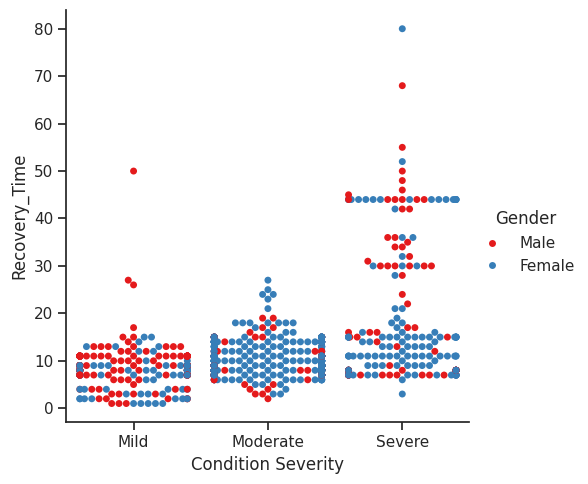

In [75]:
#cat plot of patient's condition severity and time it to recover with gender distribution
sns.catplot(data=df, x="Condition Severity", y="Recovery_Time", hue="Gender", kind="swarm")

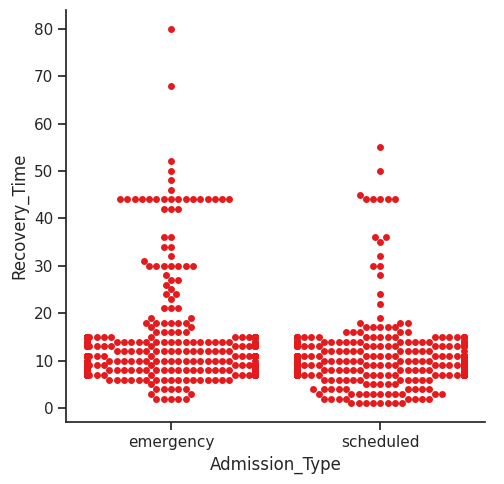

In [82]:
#cat plot of patient's admission type and time it to recover distribution
sns.catplot(data=df, x="Admission_Type", y="Recovery_Time", kind="swarm")

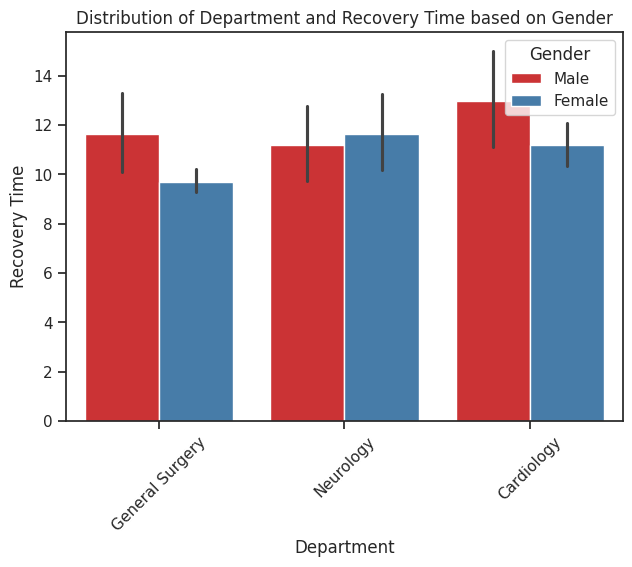

In [93]:
#Barplot showing distribution of department and respective Recovery_time based on gender distribution
sns.barplot(x='Department', y='Recovery_Time', hue='Gender', data=df)
plt.title('Distribution of Department and Recovery Time based on Gender')
plt.xlabel('Department')
plt.ylabel('Recovery Time')
plt.xticks(rotation=45)
plt.show()

In [56]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz(df)

Shape of your Data Set loaded: (1189, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 338 dup

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
P_Age,int64,0.000000,6,3.000000,60.000000,No issue
Gender,object,0.000000,0,,,No issue
Pre-existing Conditions,int64,0.000000,0,0.000000,3.000000,No issue
Condition Severity,object,0.822562,0,,,"7 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Disease type,object,0.000000,0,,,No issue
Admission_Type,object,0.000000,0,,,No issue
Department,object,0.000000,0,,,No issue
Recovery_Time,int64,0.000000,5,1.000000,80.000000,Column has 75 outliers greater than upper bound (18.00) or lower than lower bound(2.00). Cap them or remove them.


Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,18,Male,0,Mild,Normal,Emergency,General Surgery,6
1,15,Female,1,Moderate,ICU,Scheduled,Neurology,8
2,12,Male,1,Severe,Highly communicable,Emergency,Cardiology,16
3,19,Female,1,Mild,Normal,Scheduled,General Surgery,6
4,17,Male,0,Moderate,ICU,Emergency,Neurology,8
...,...,...,...,...,...,...,...,...
1184,57,Female,2,Severe,ICU,Emergency,Cardiology,15
1185,55,Female,2,Moderate,Normal,Emergency,General Surgery,9
1186,55,Male,2,Moderate,Normal,Scheduled,Cardiology,9
1187,56,Female,2,Moderate,Normal,emergency,General Surgery,9


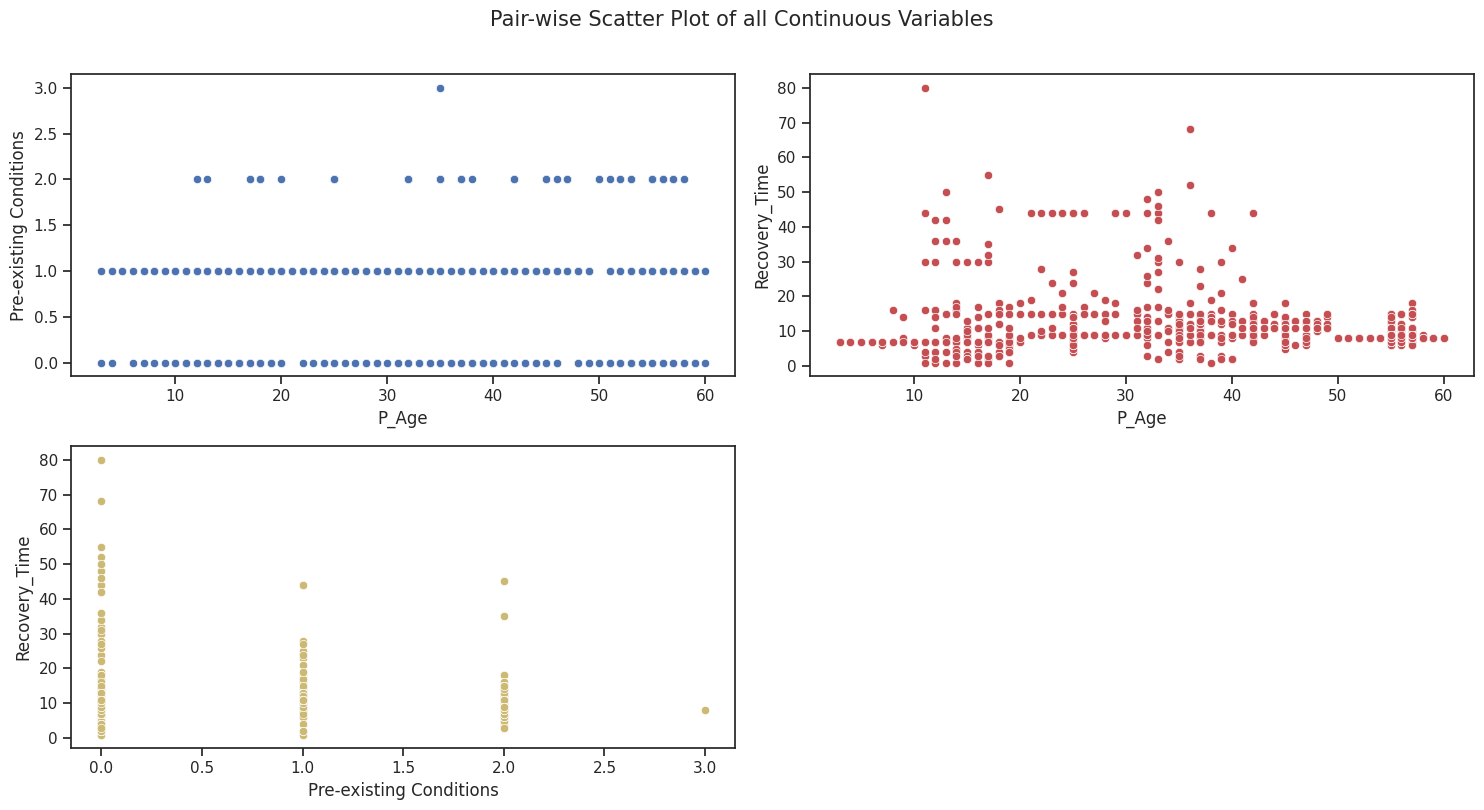

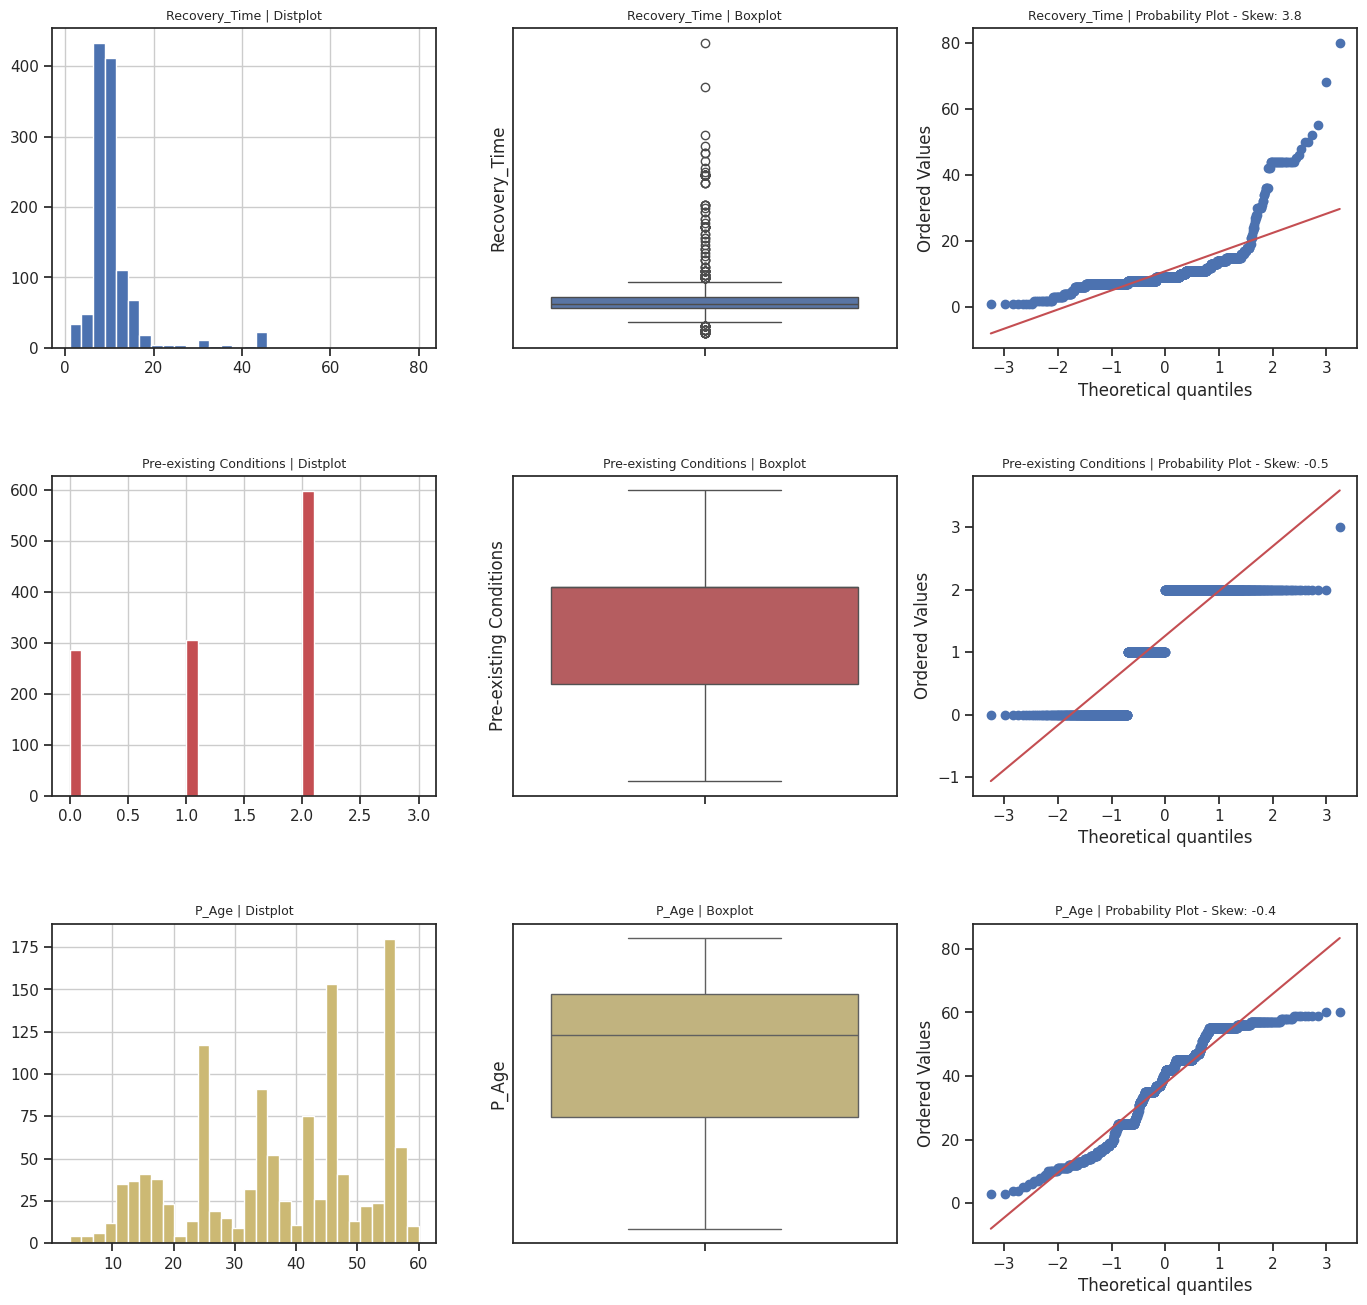

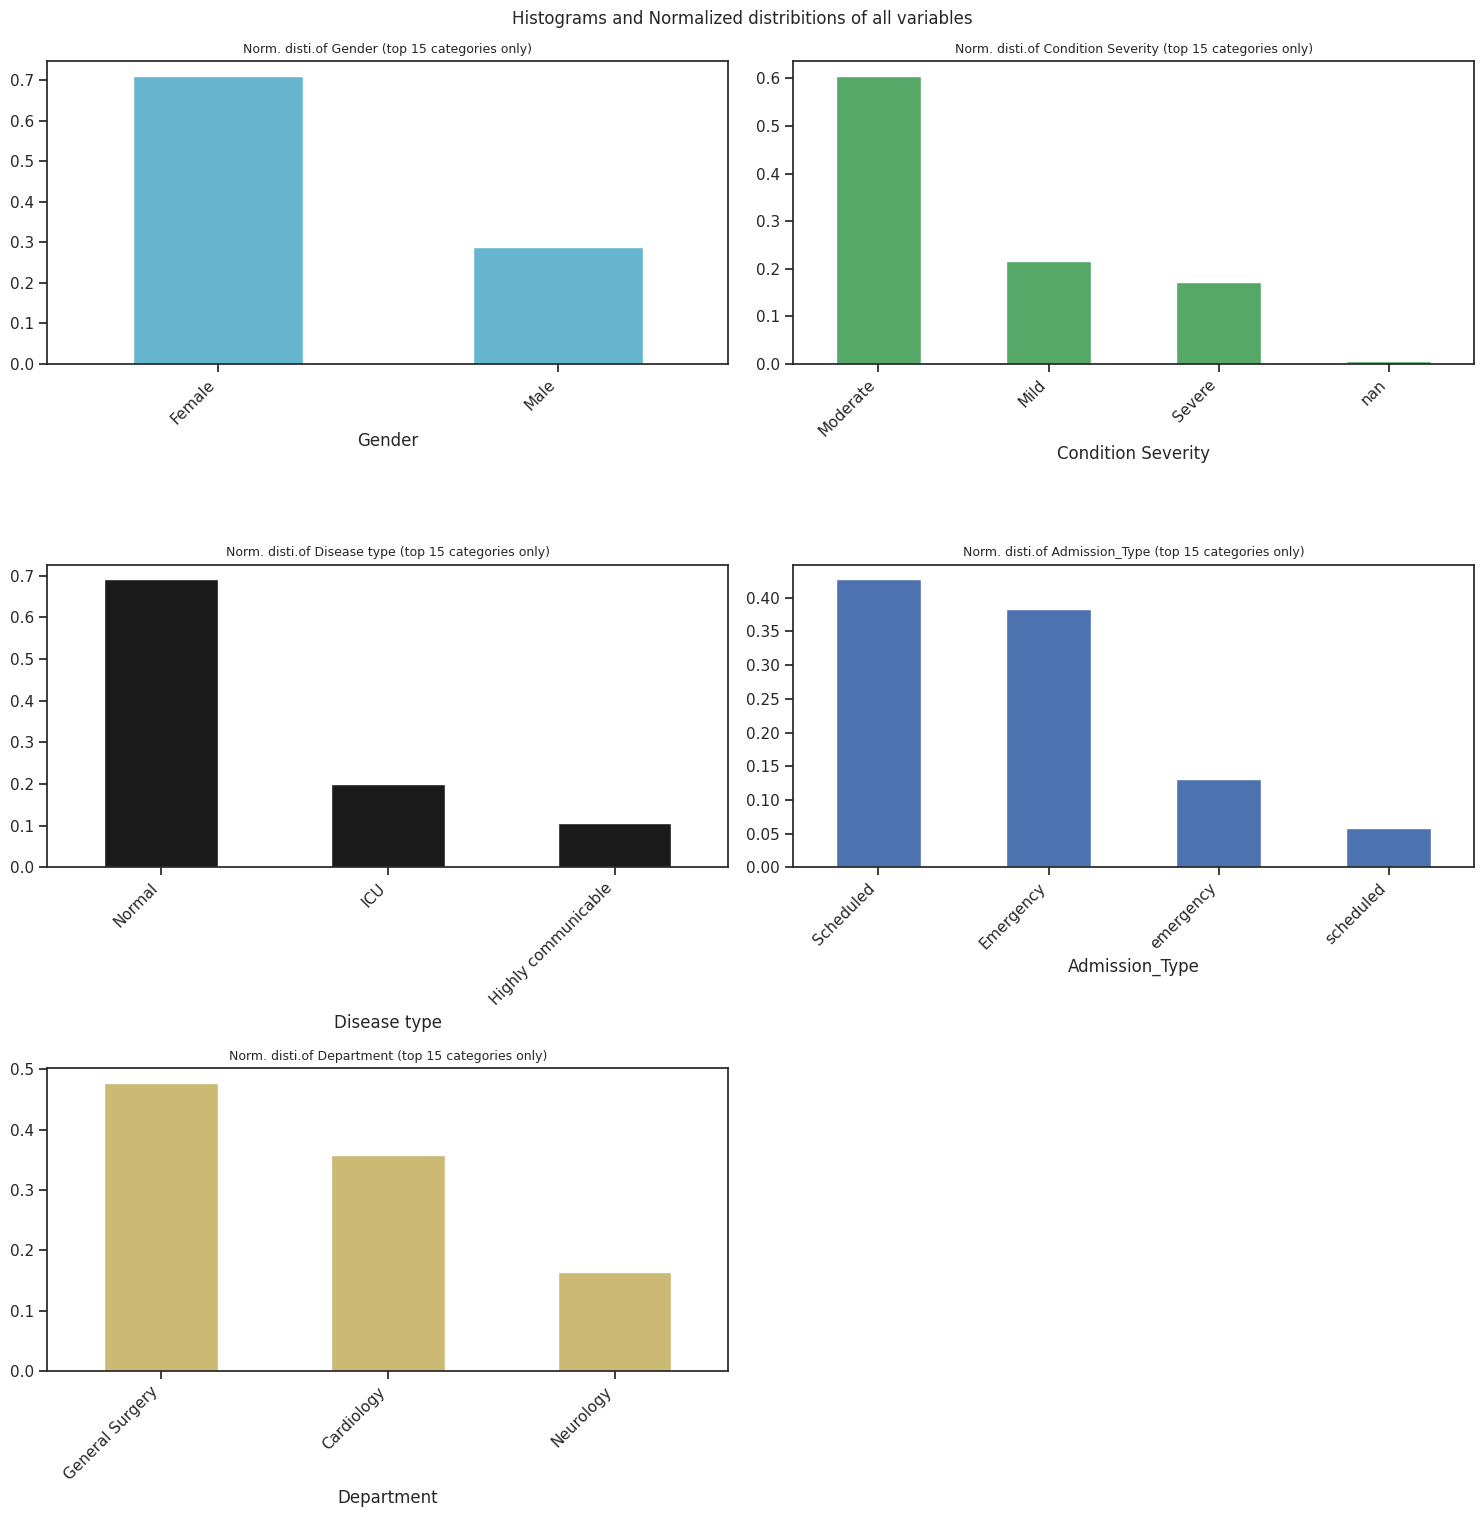

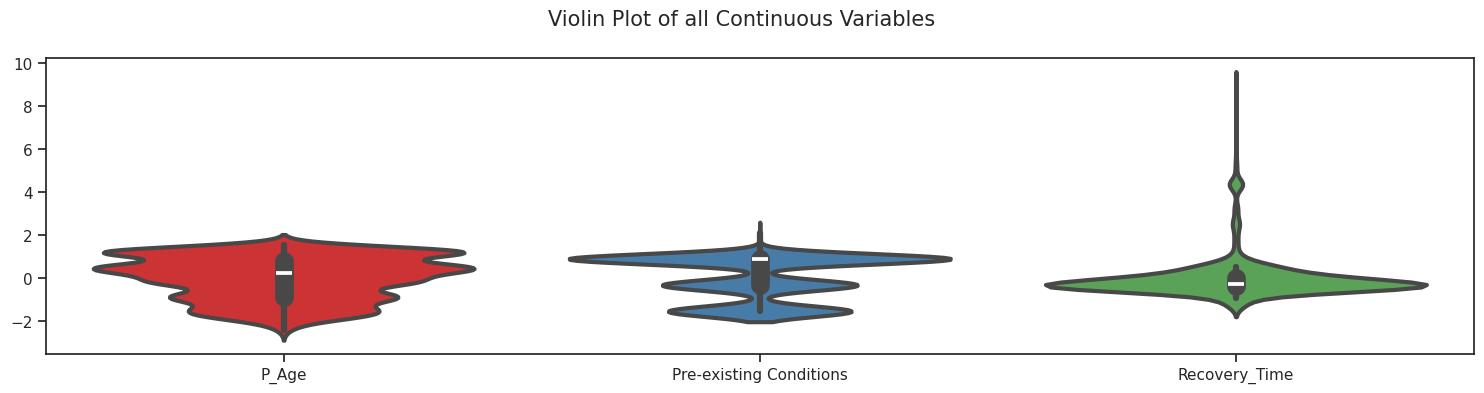

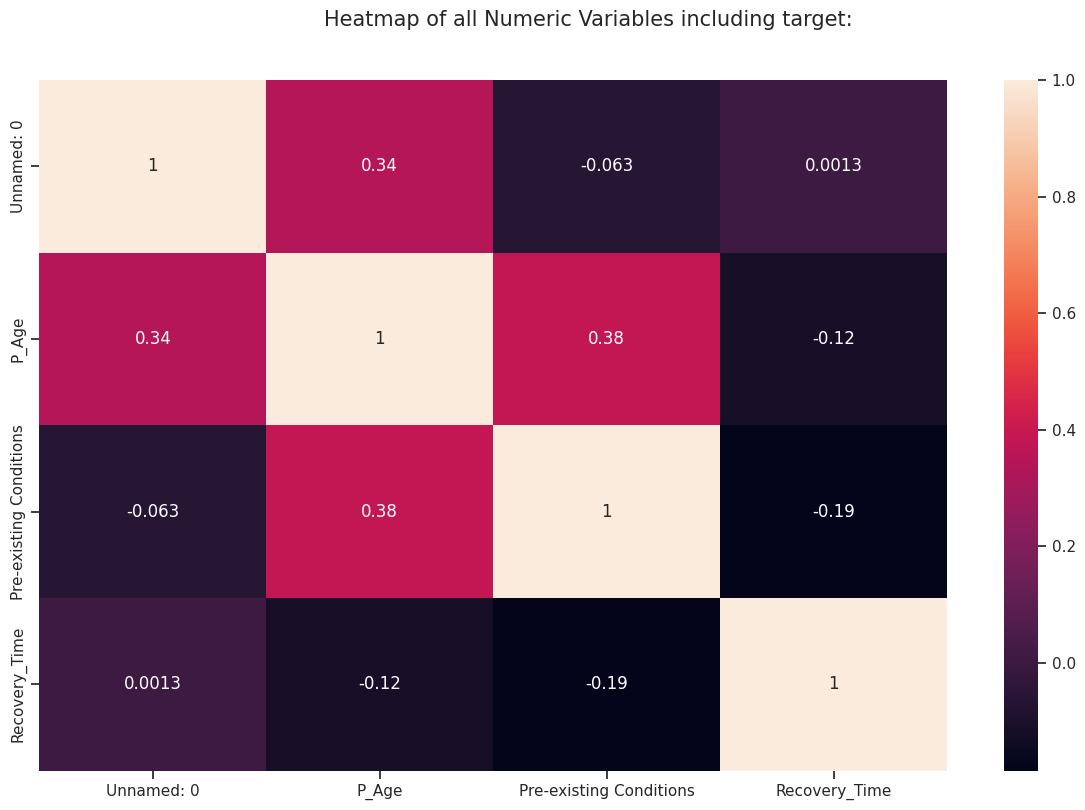

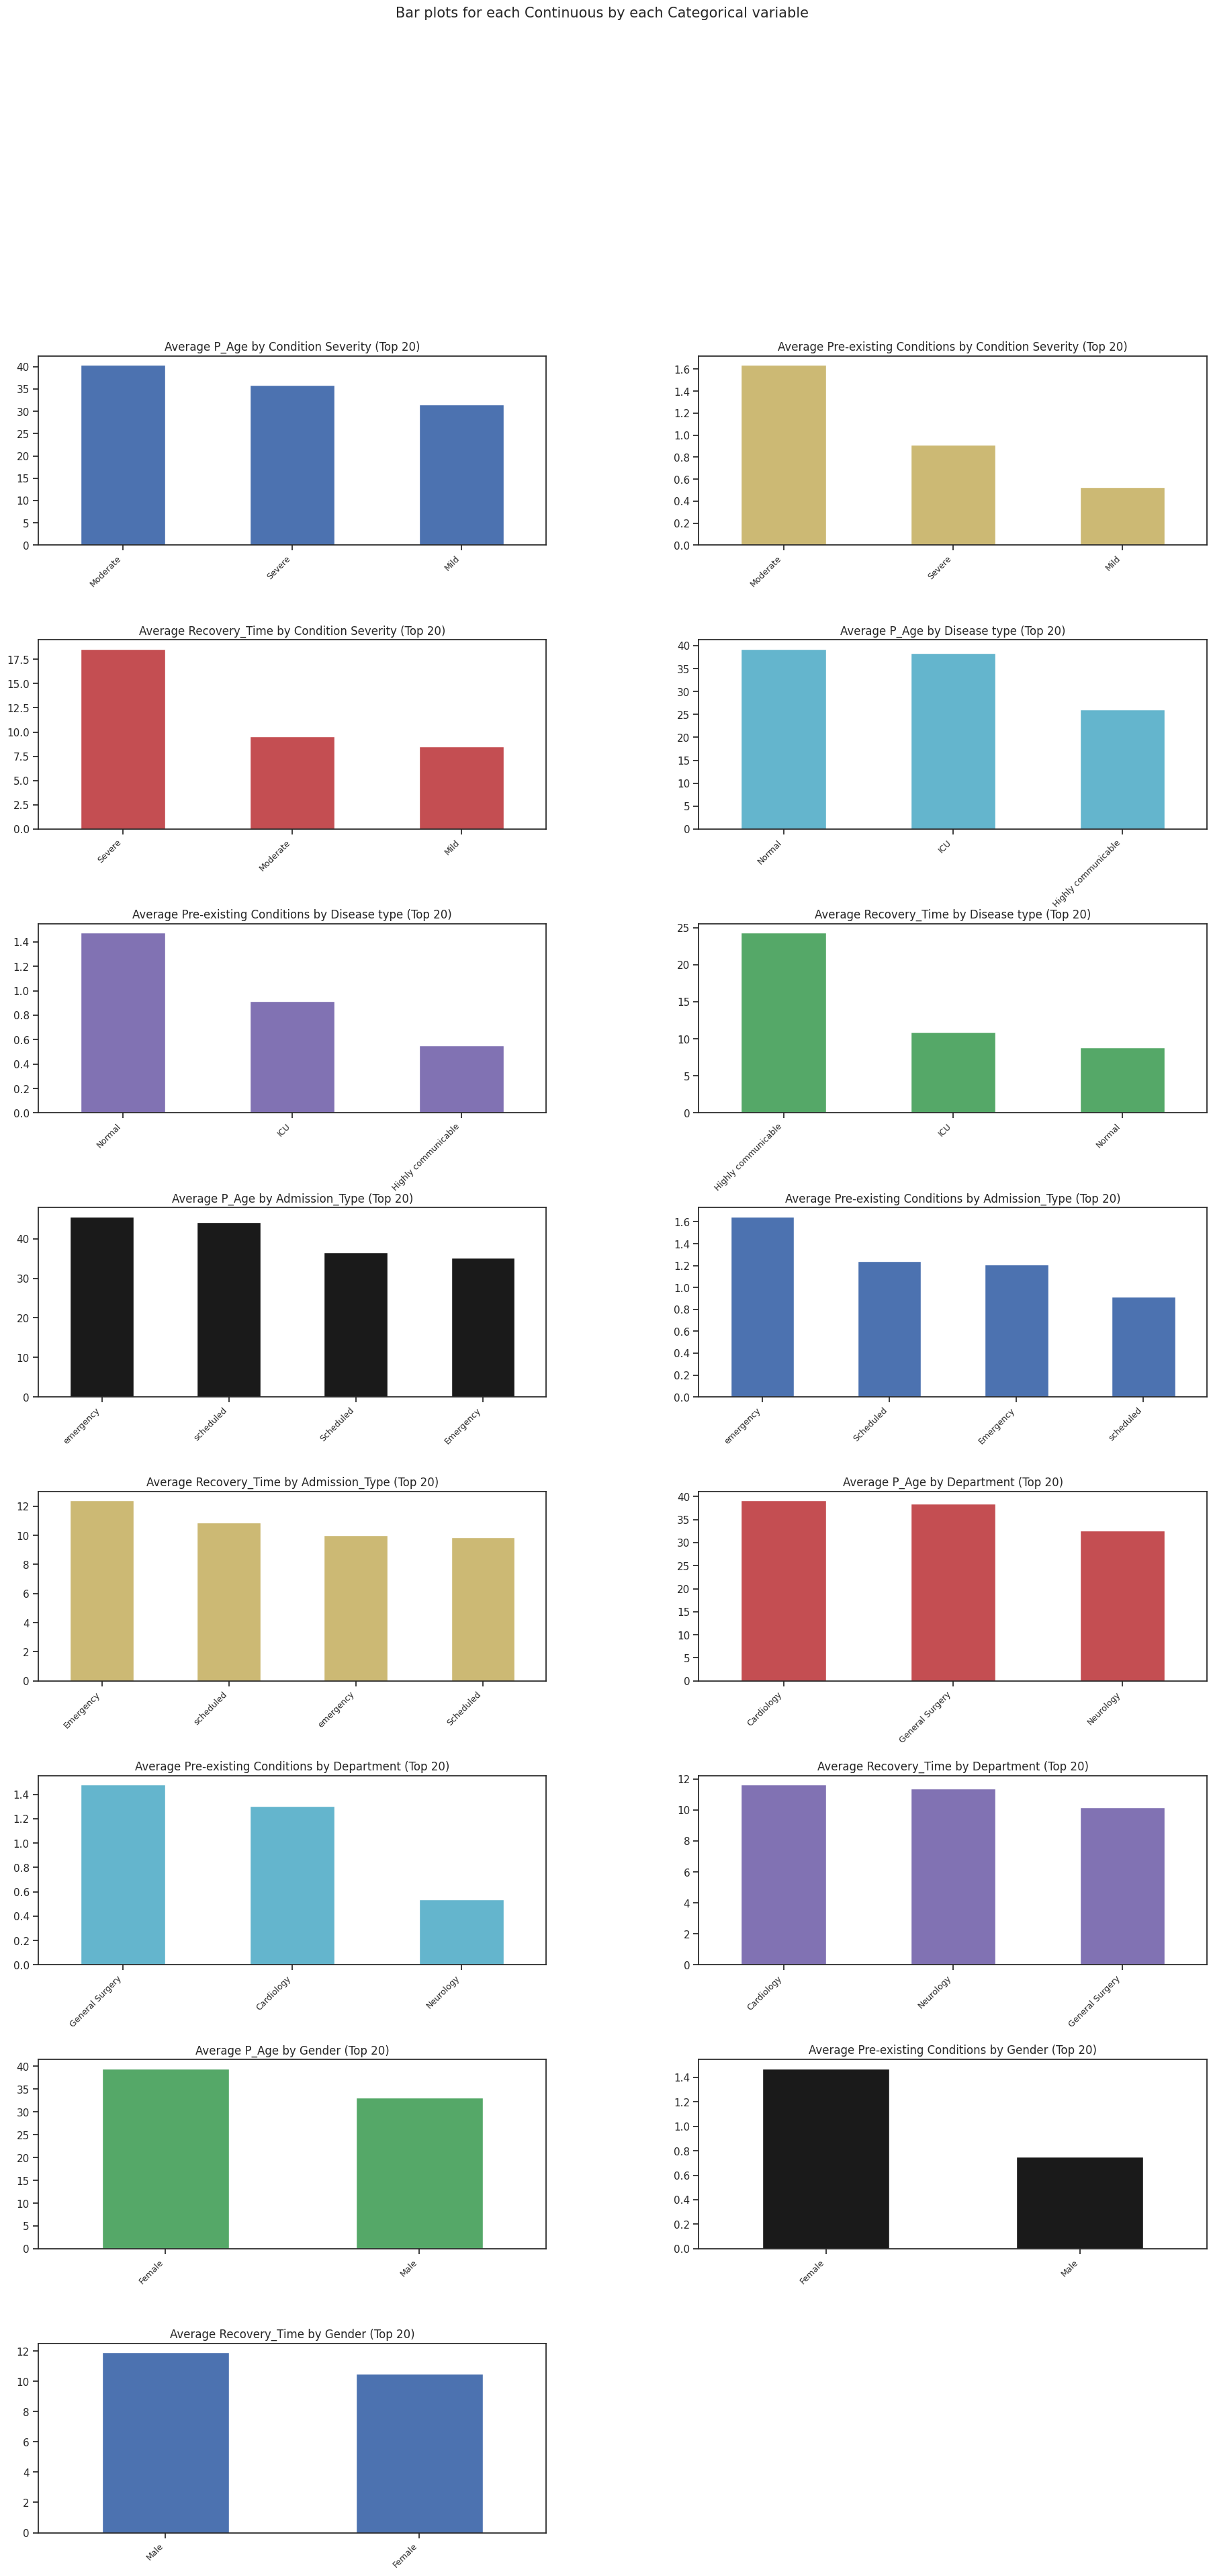

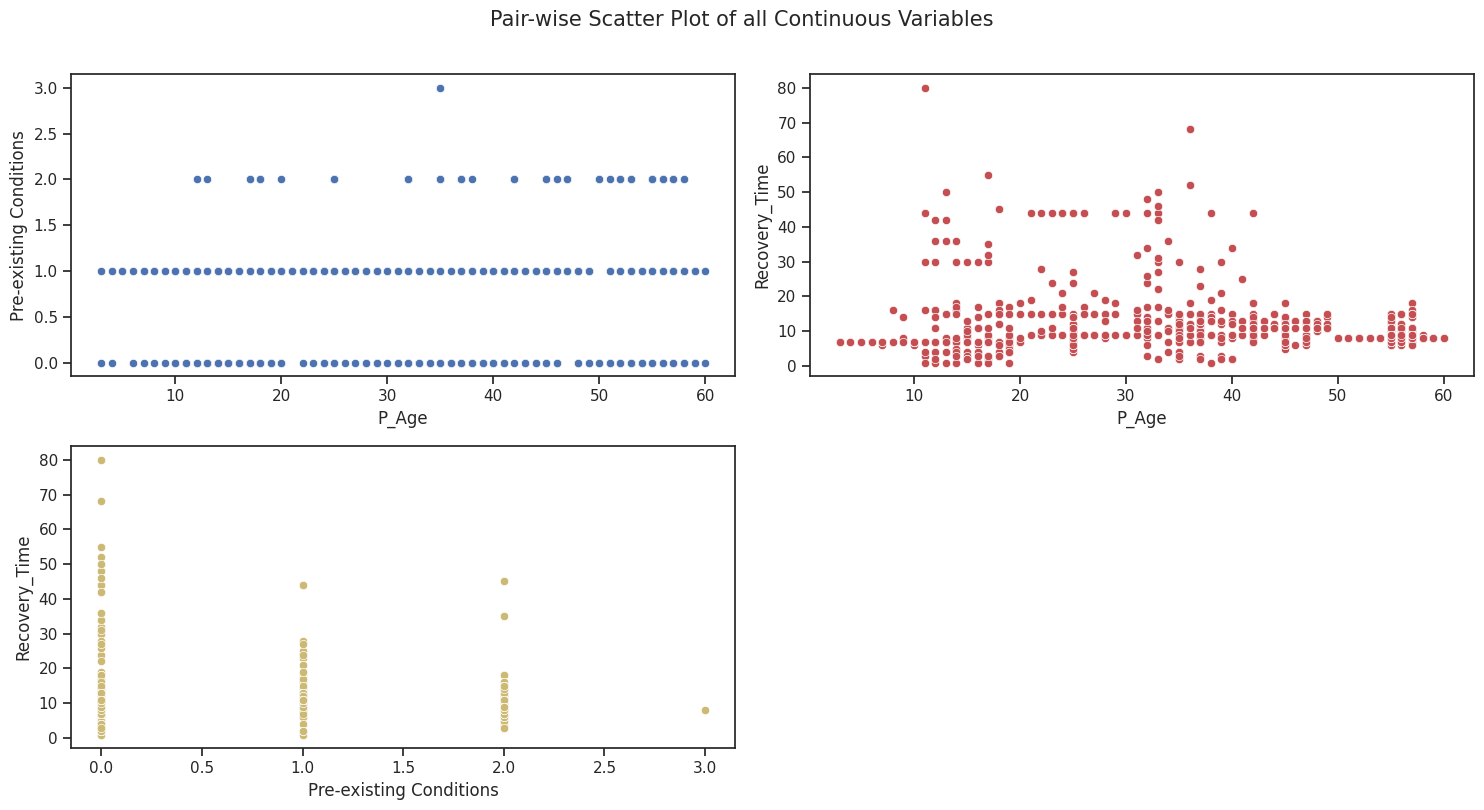

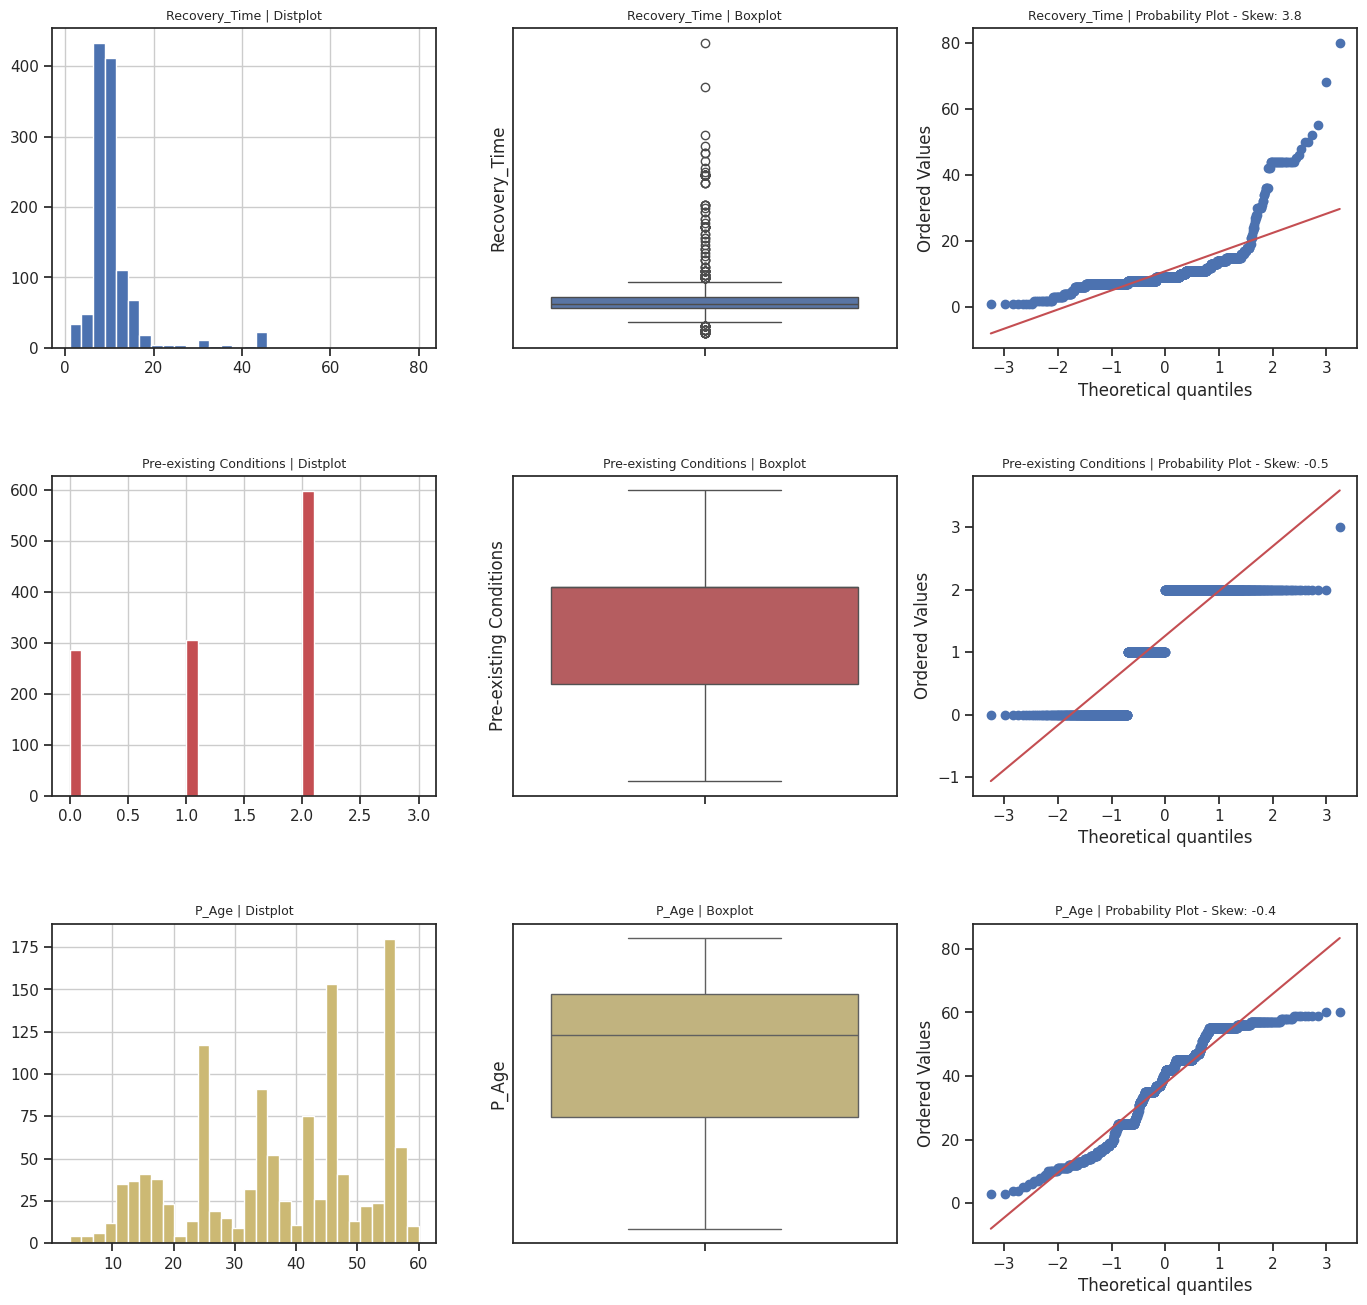

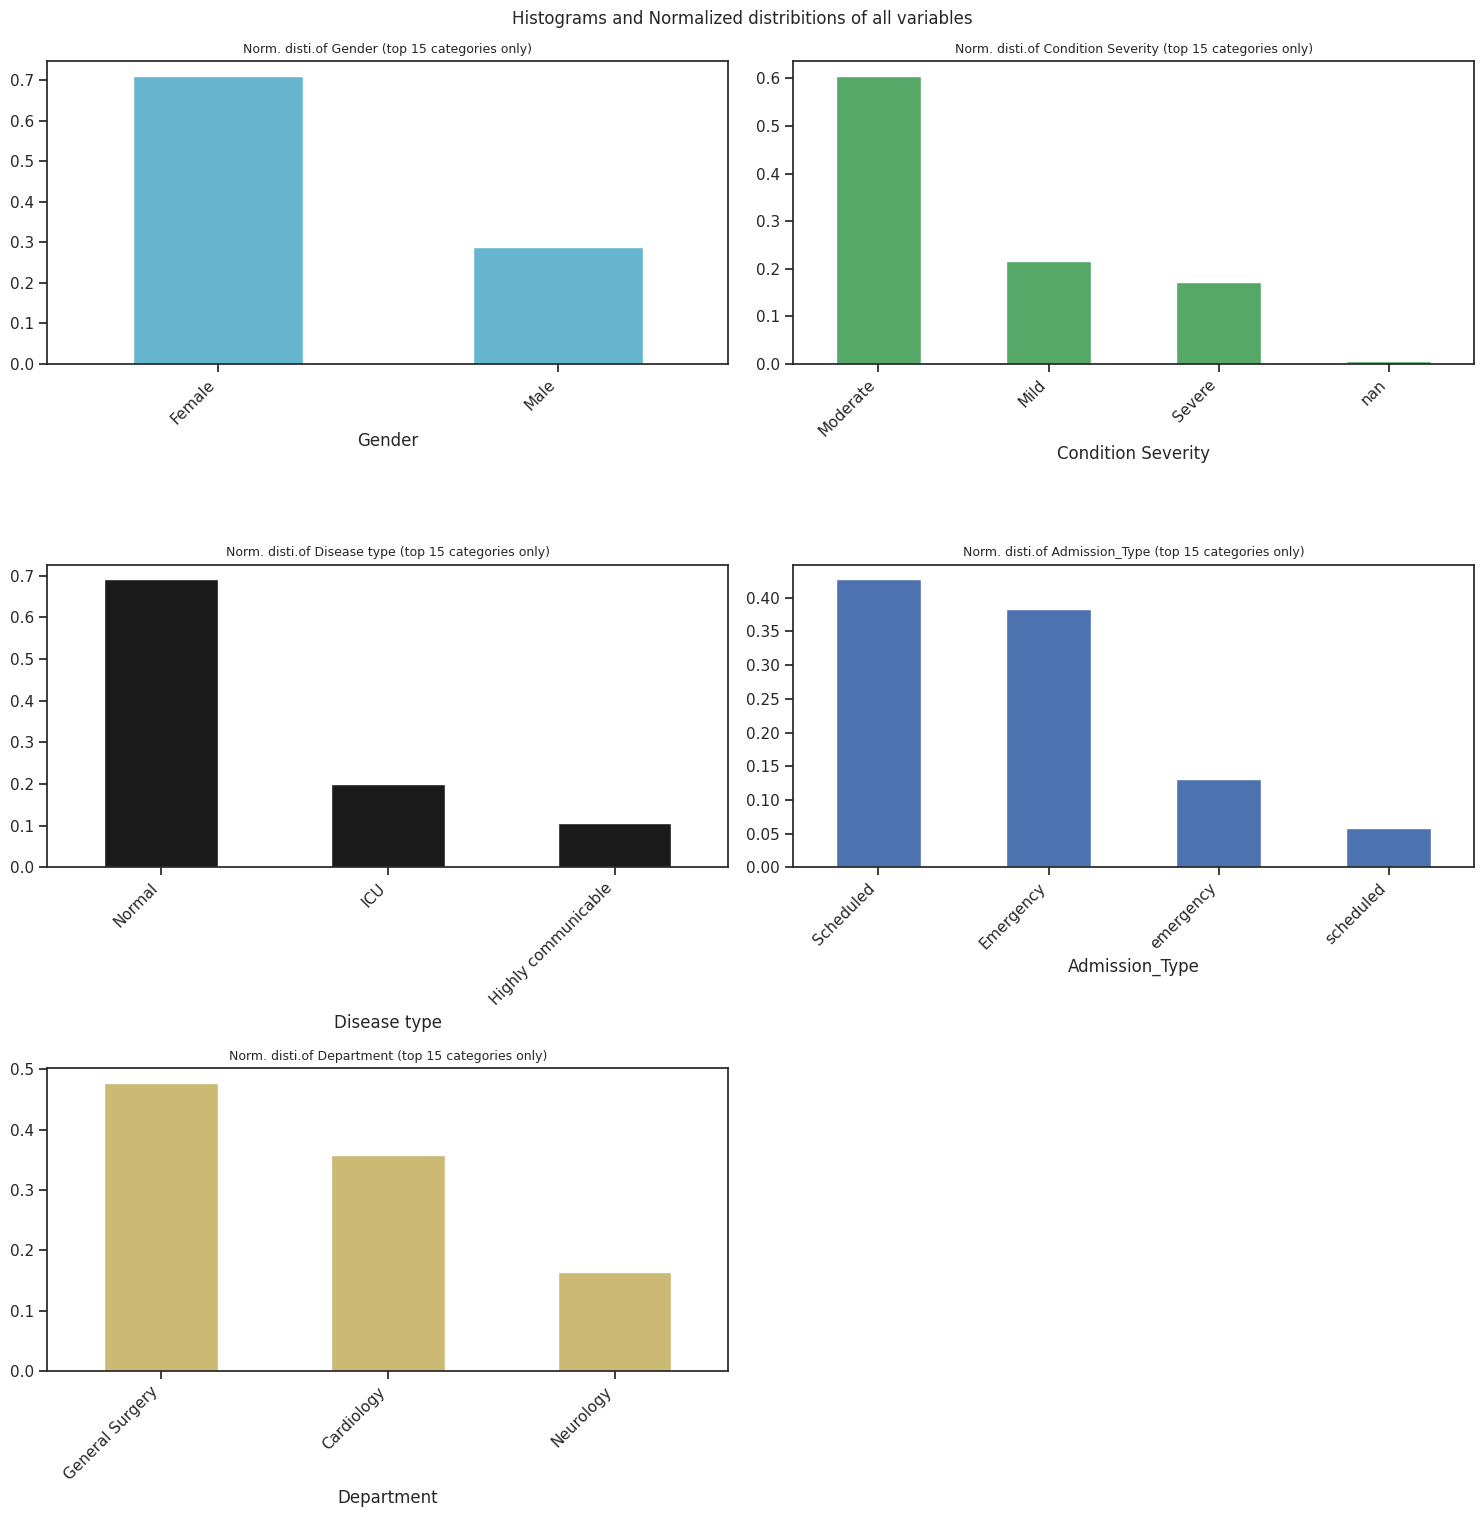

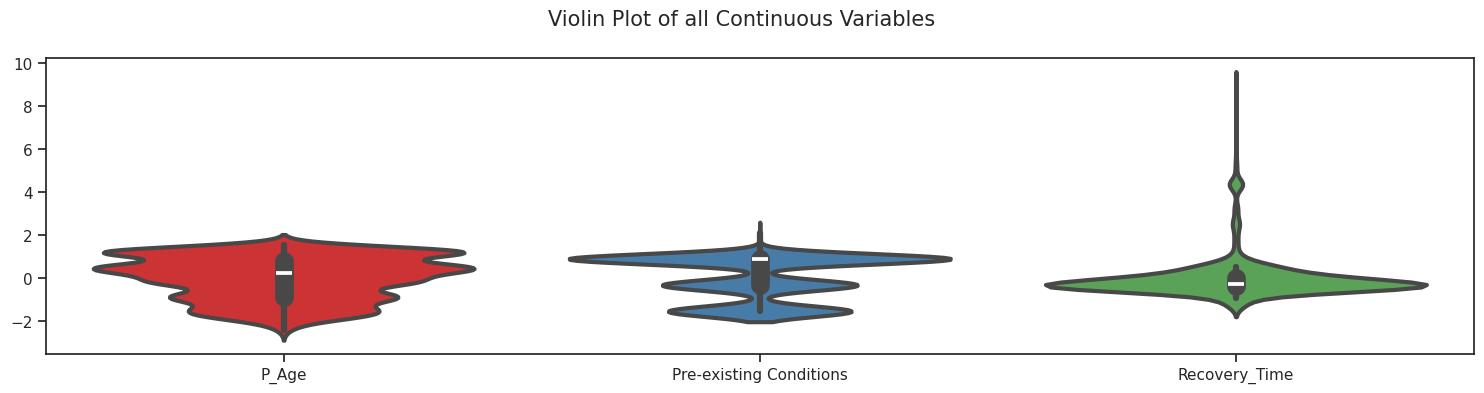

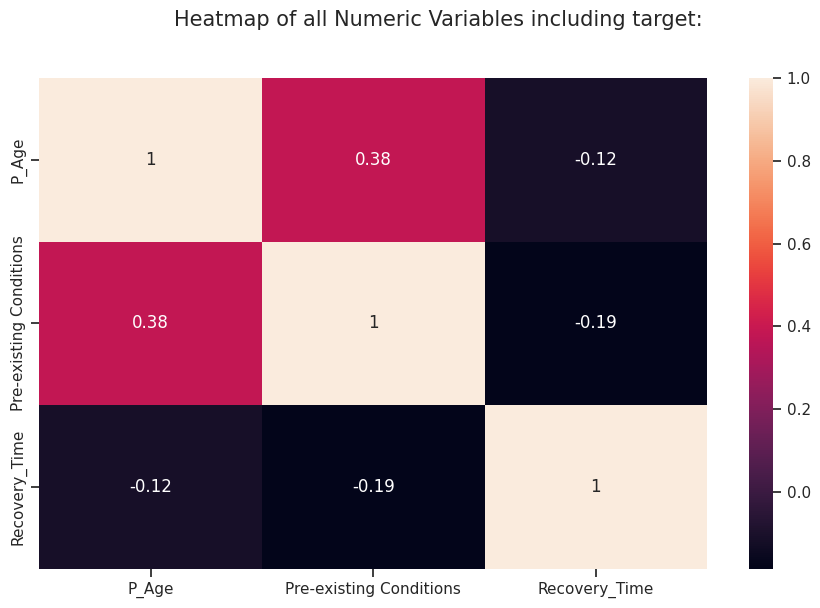

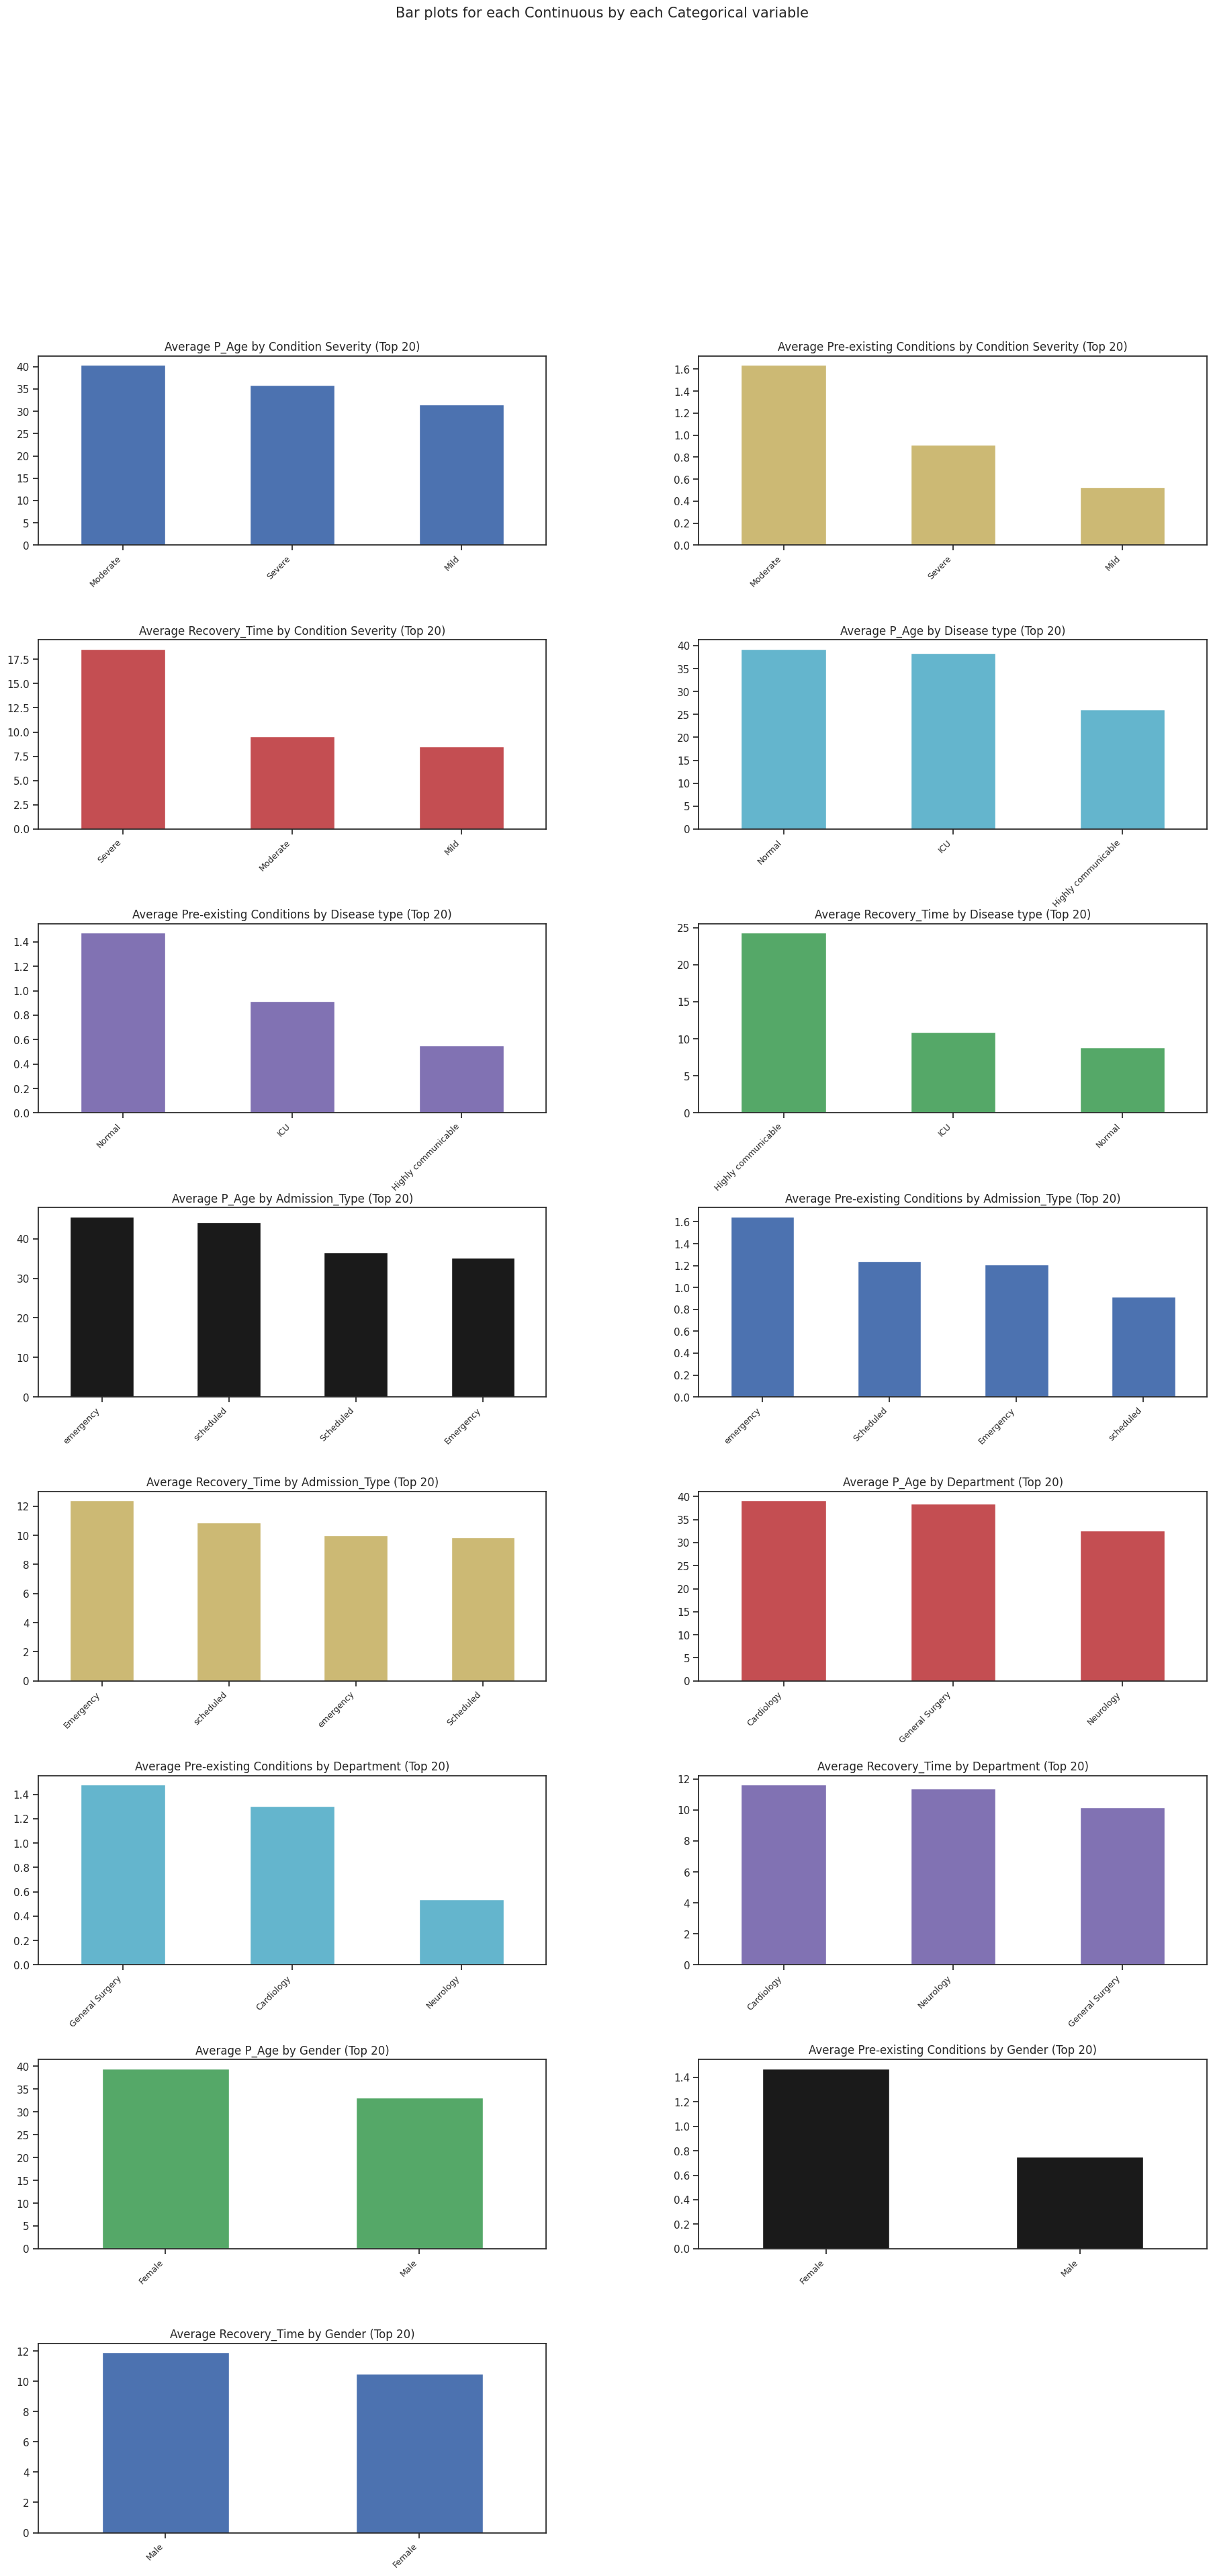

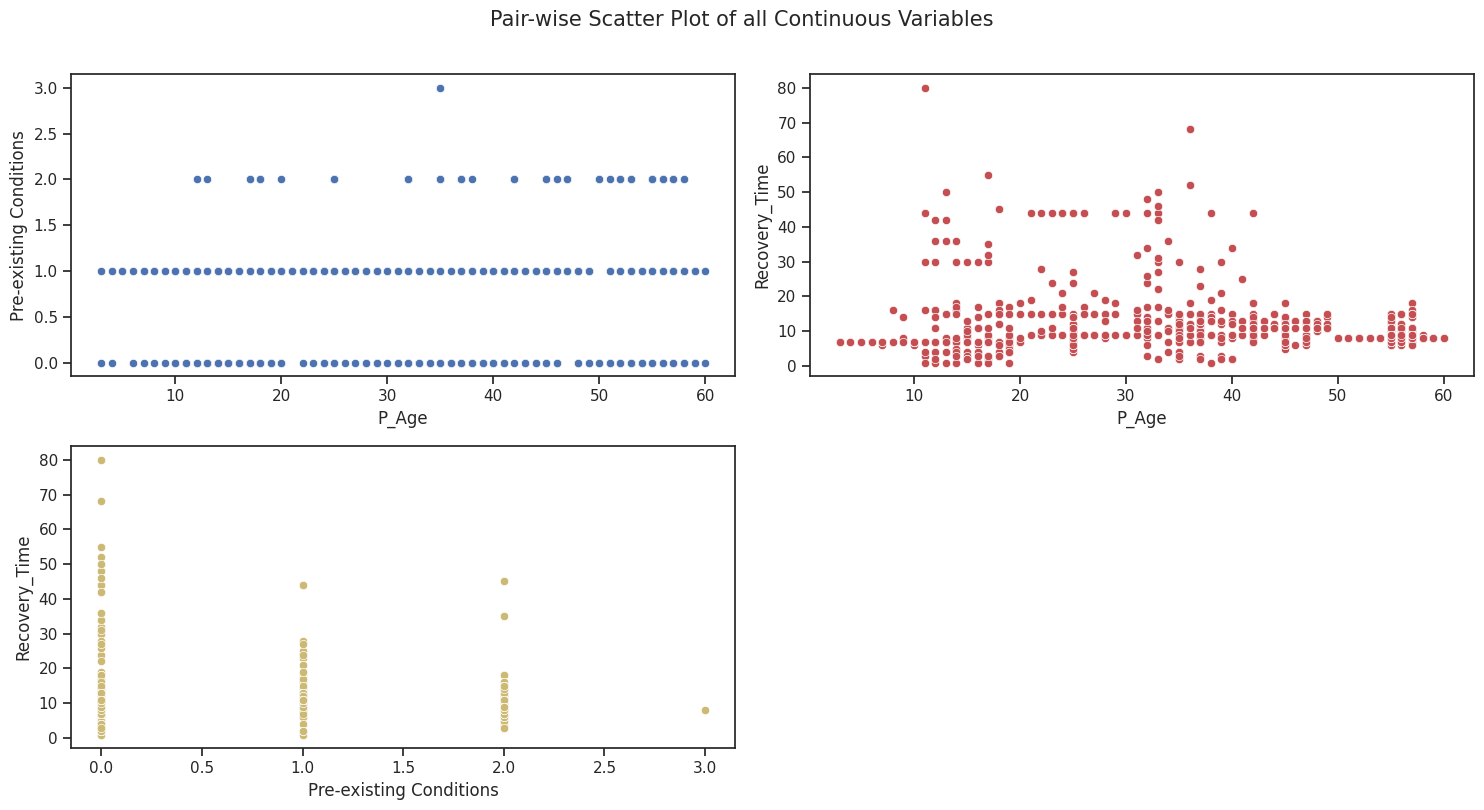

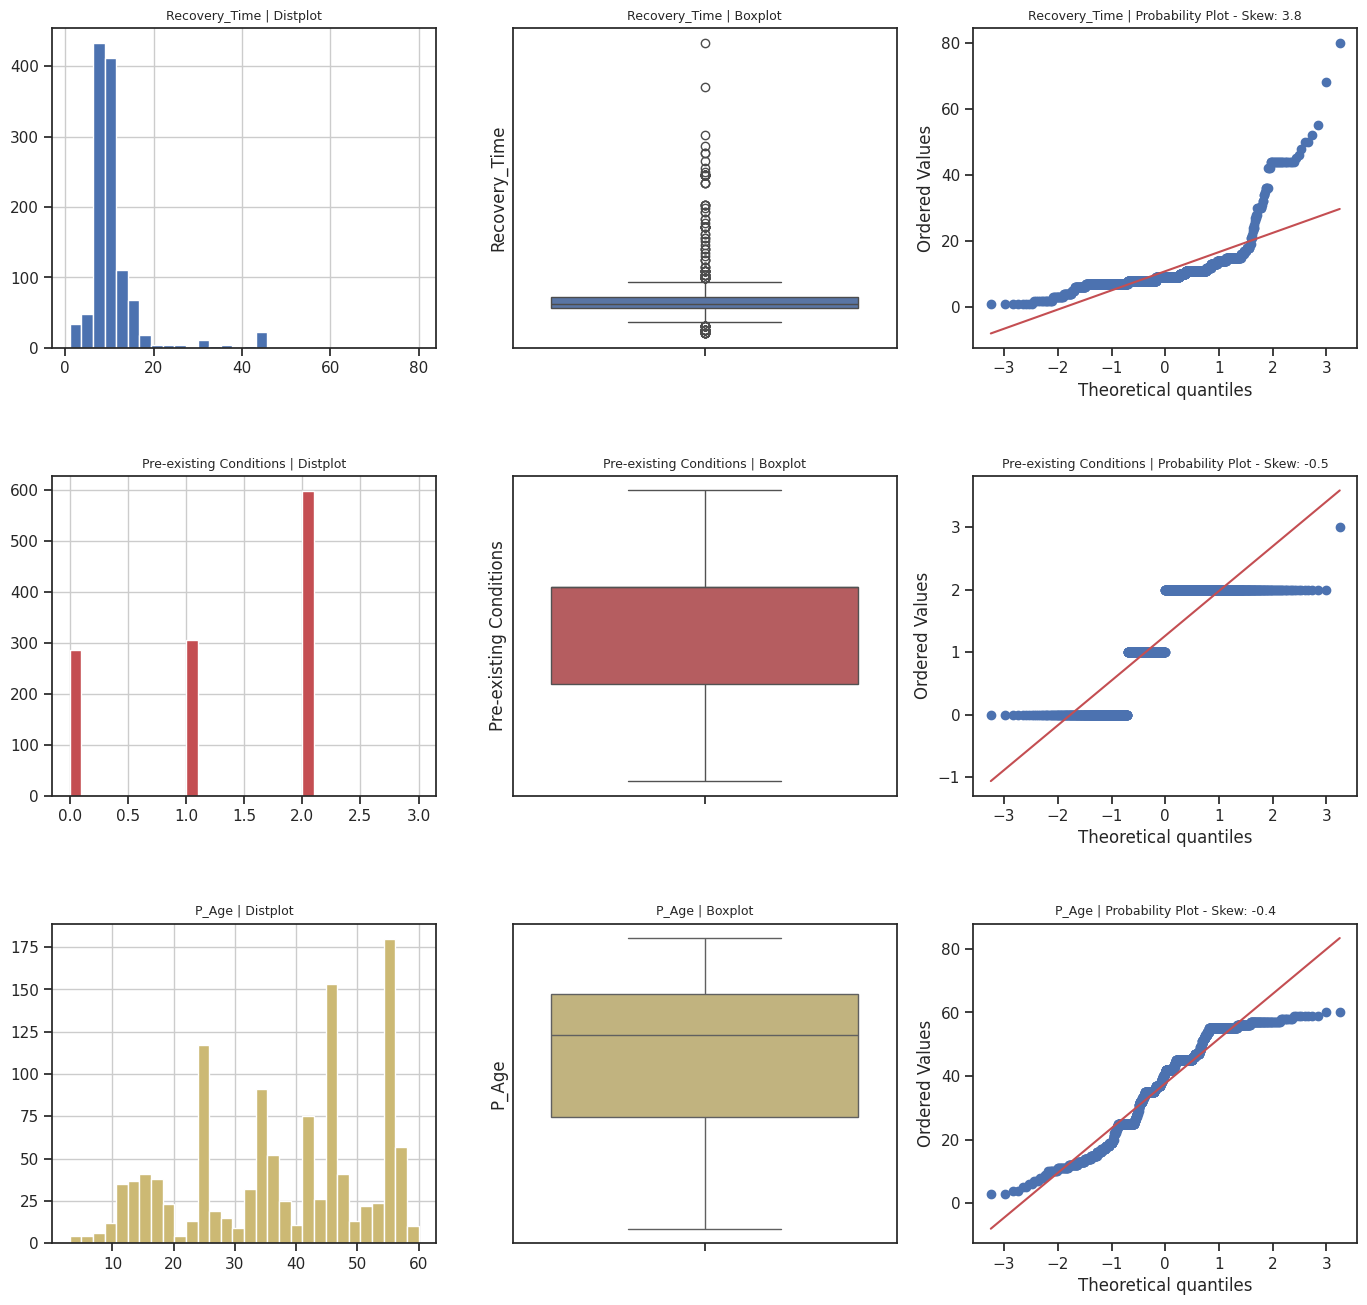

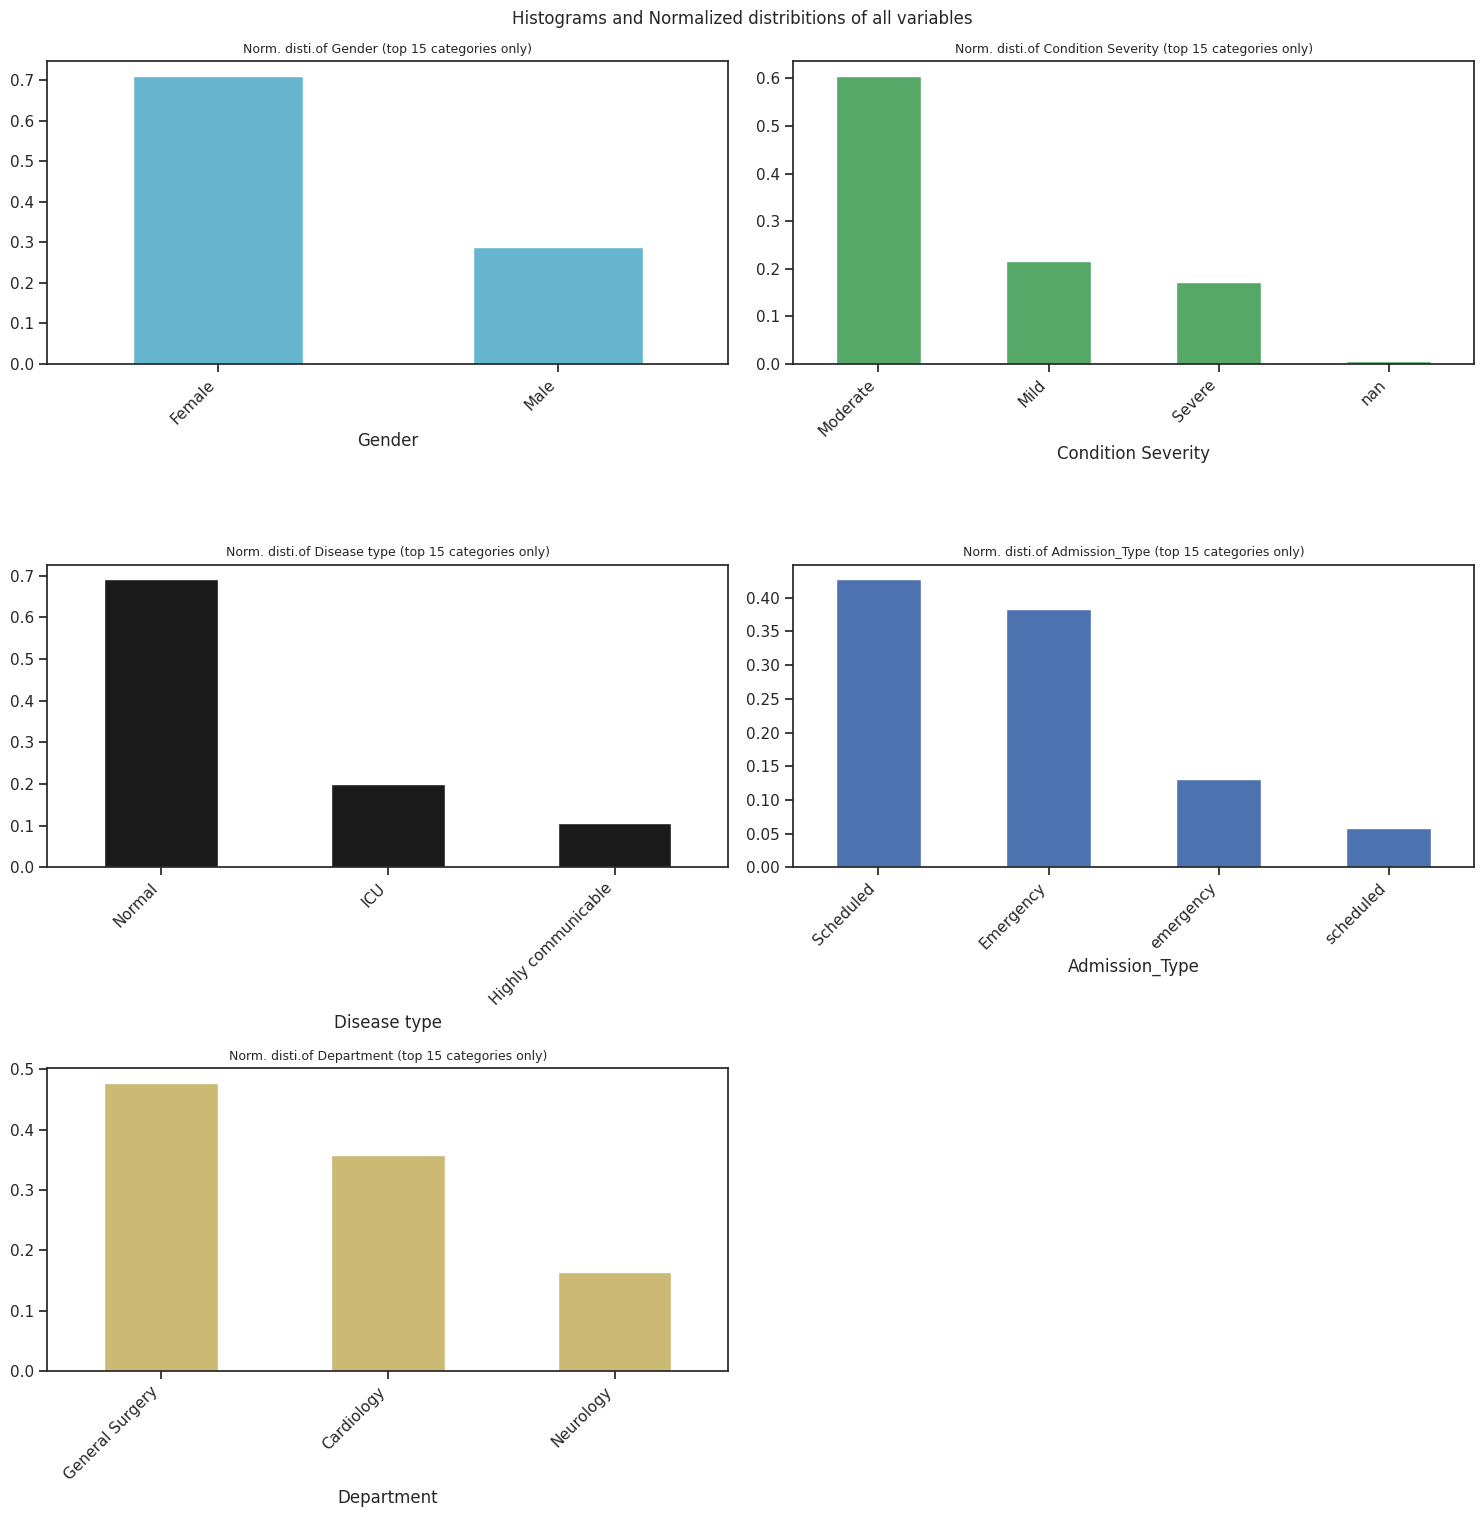

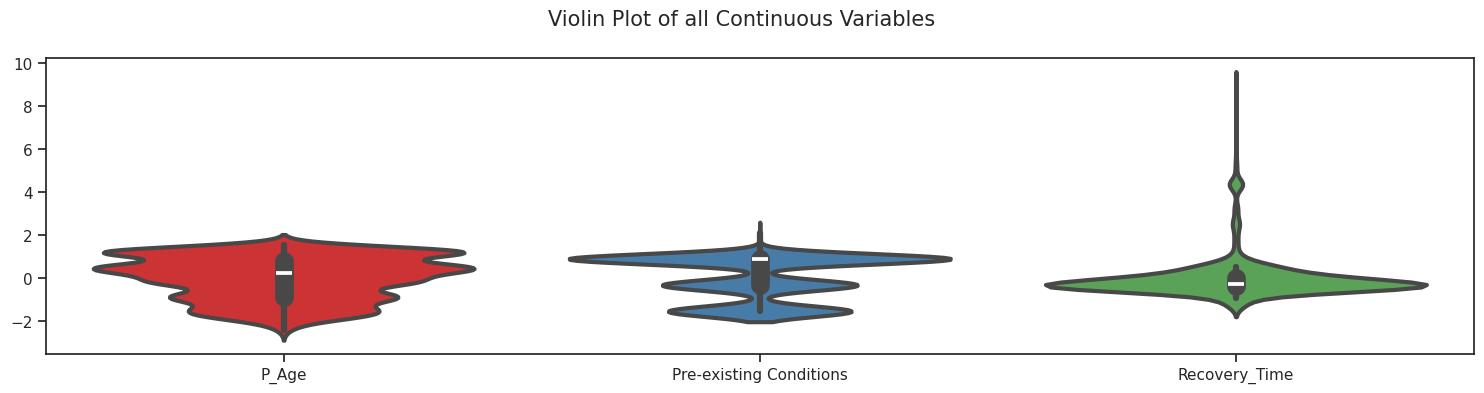

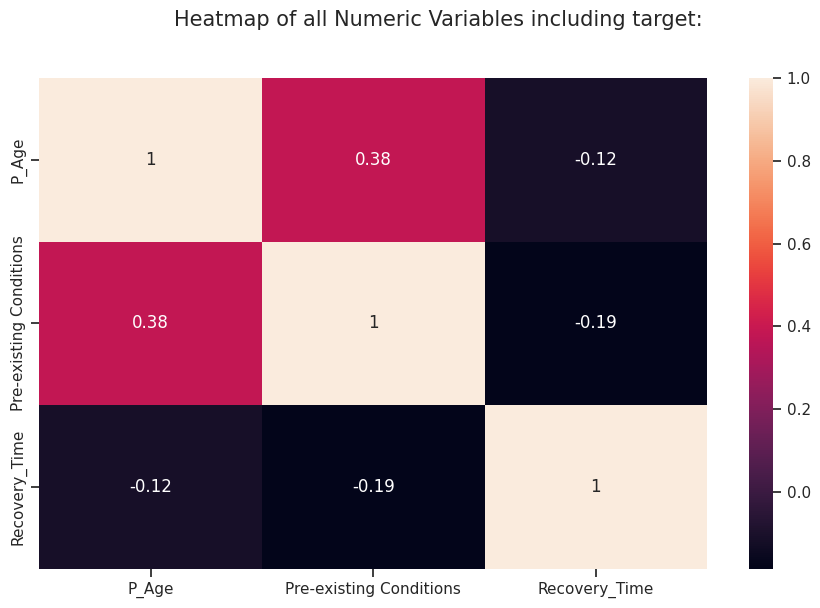

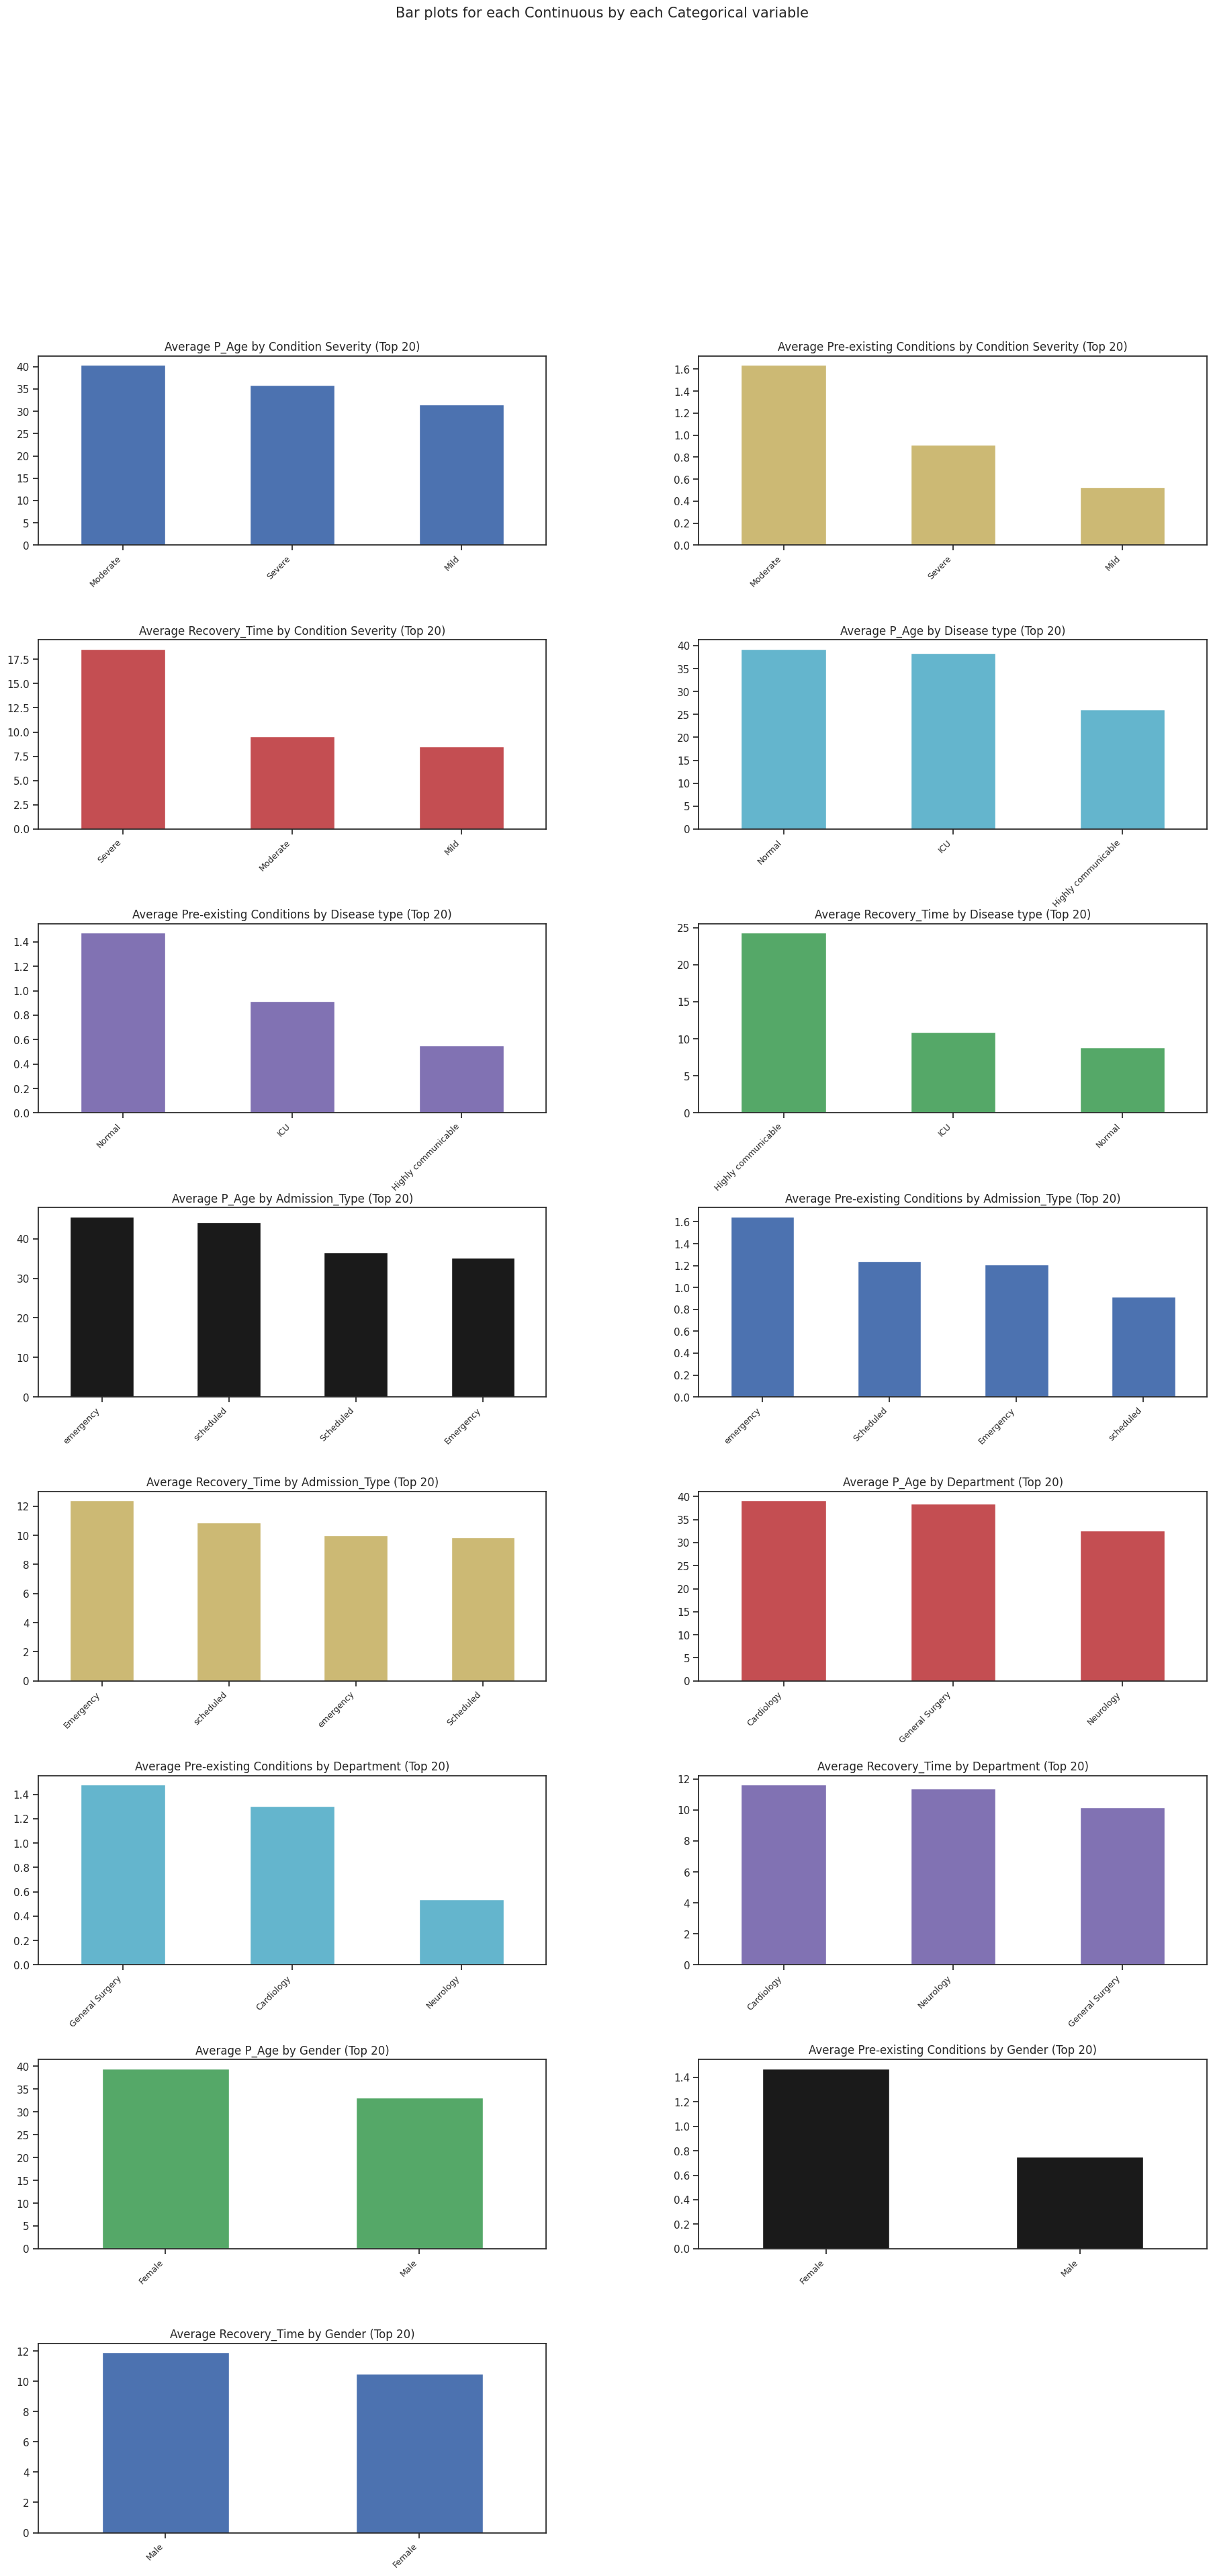

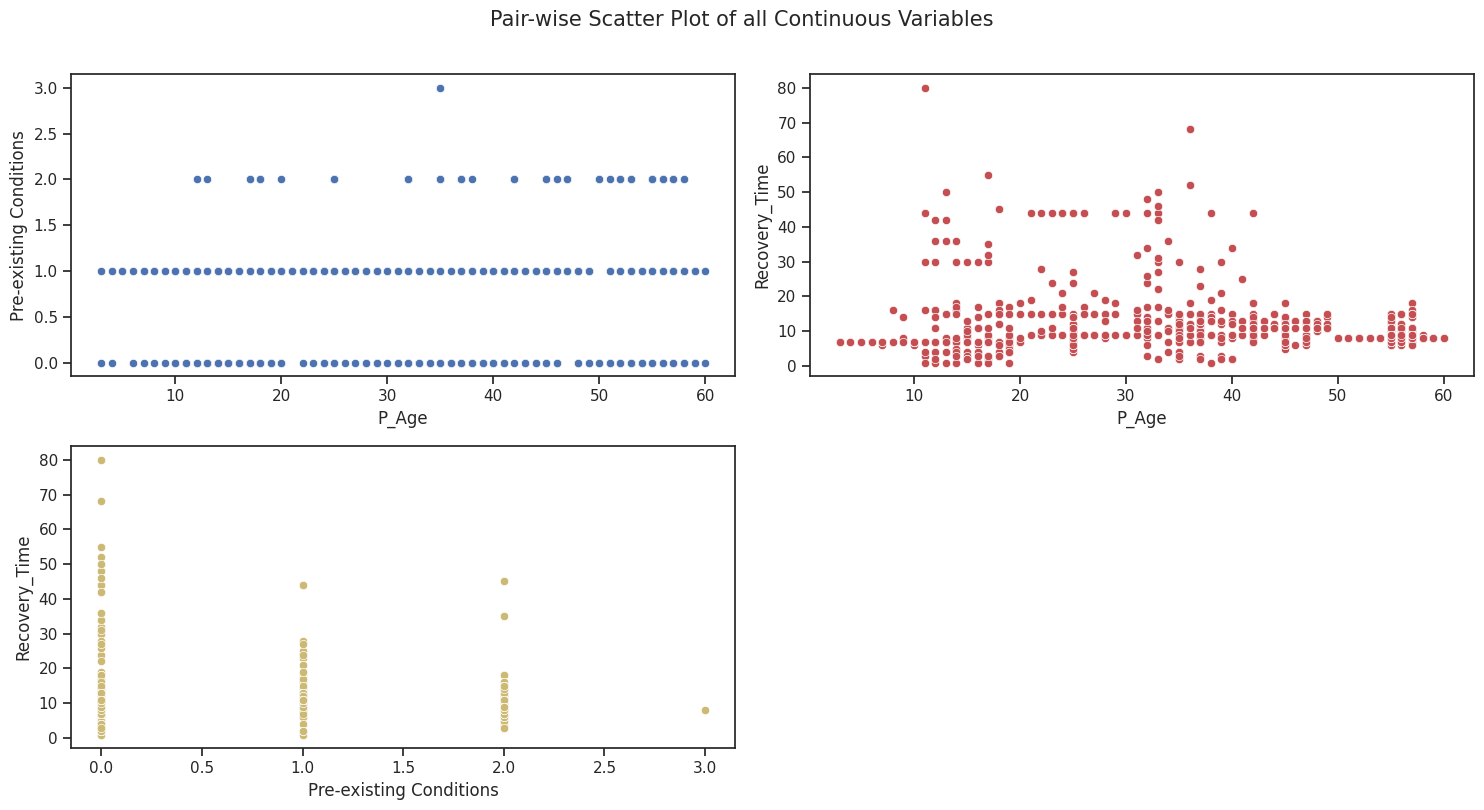

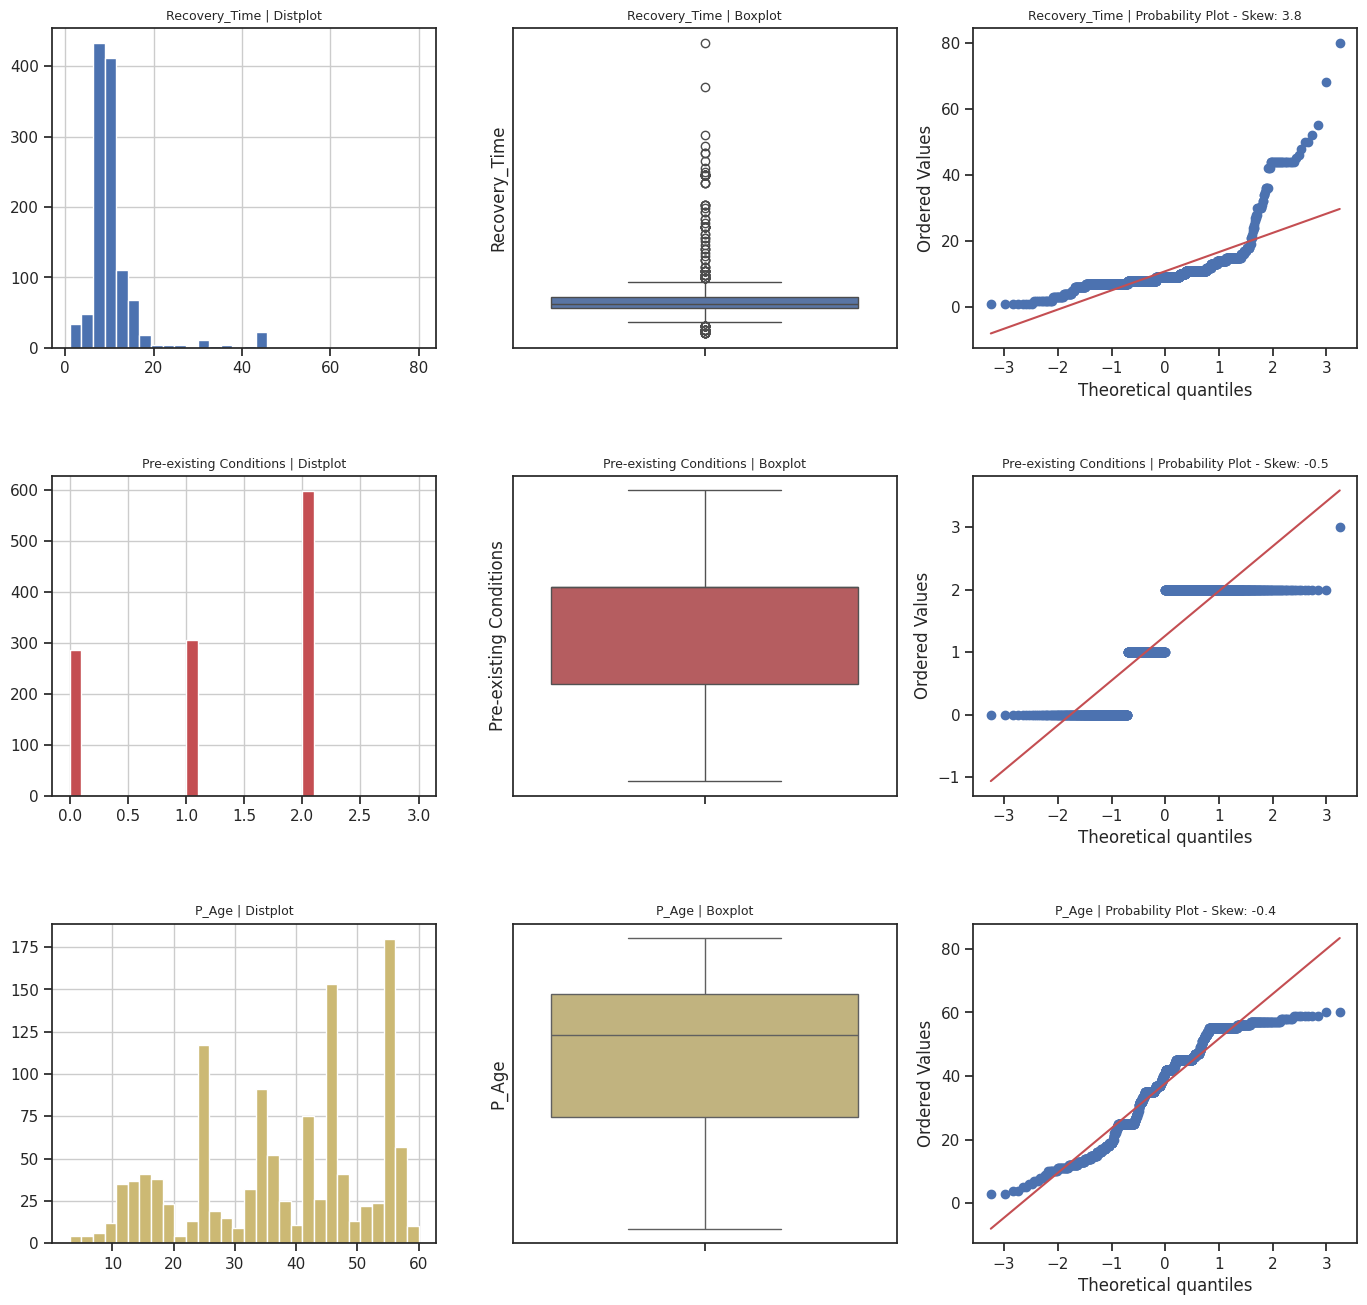

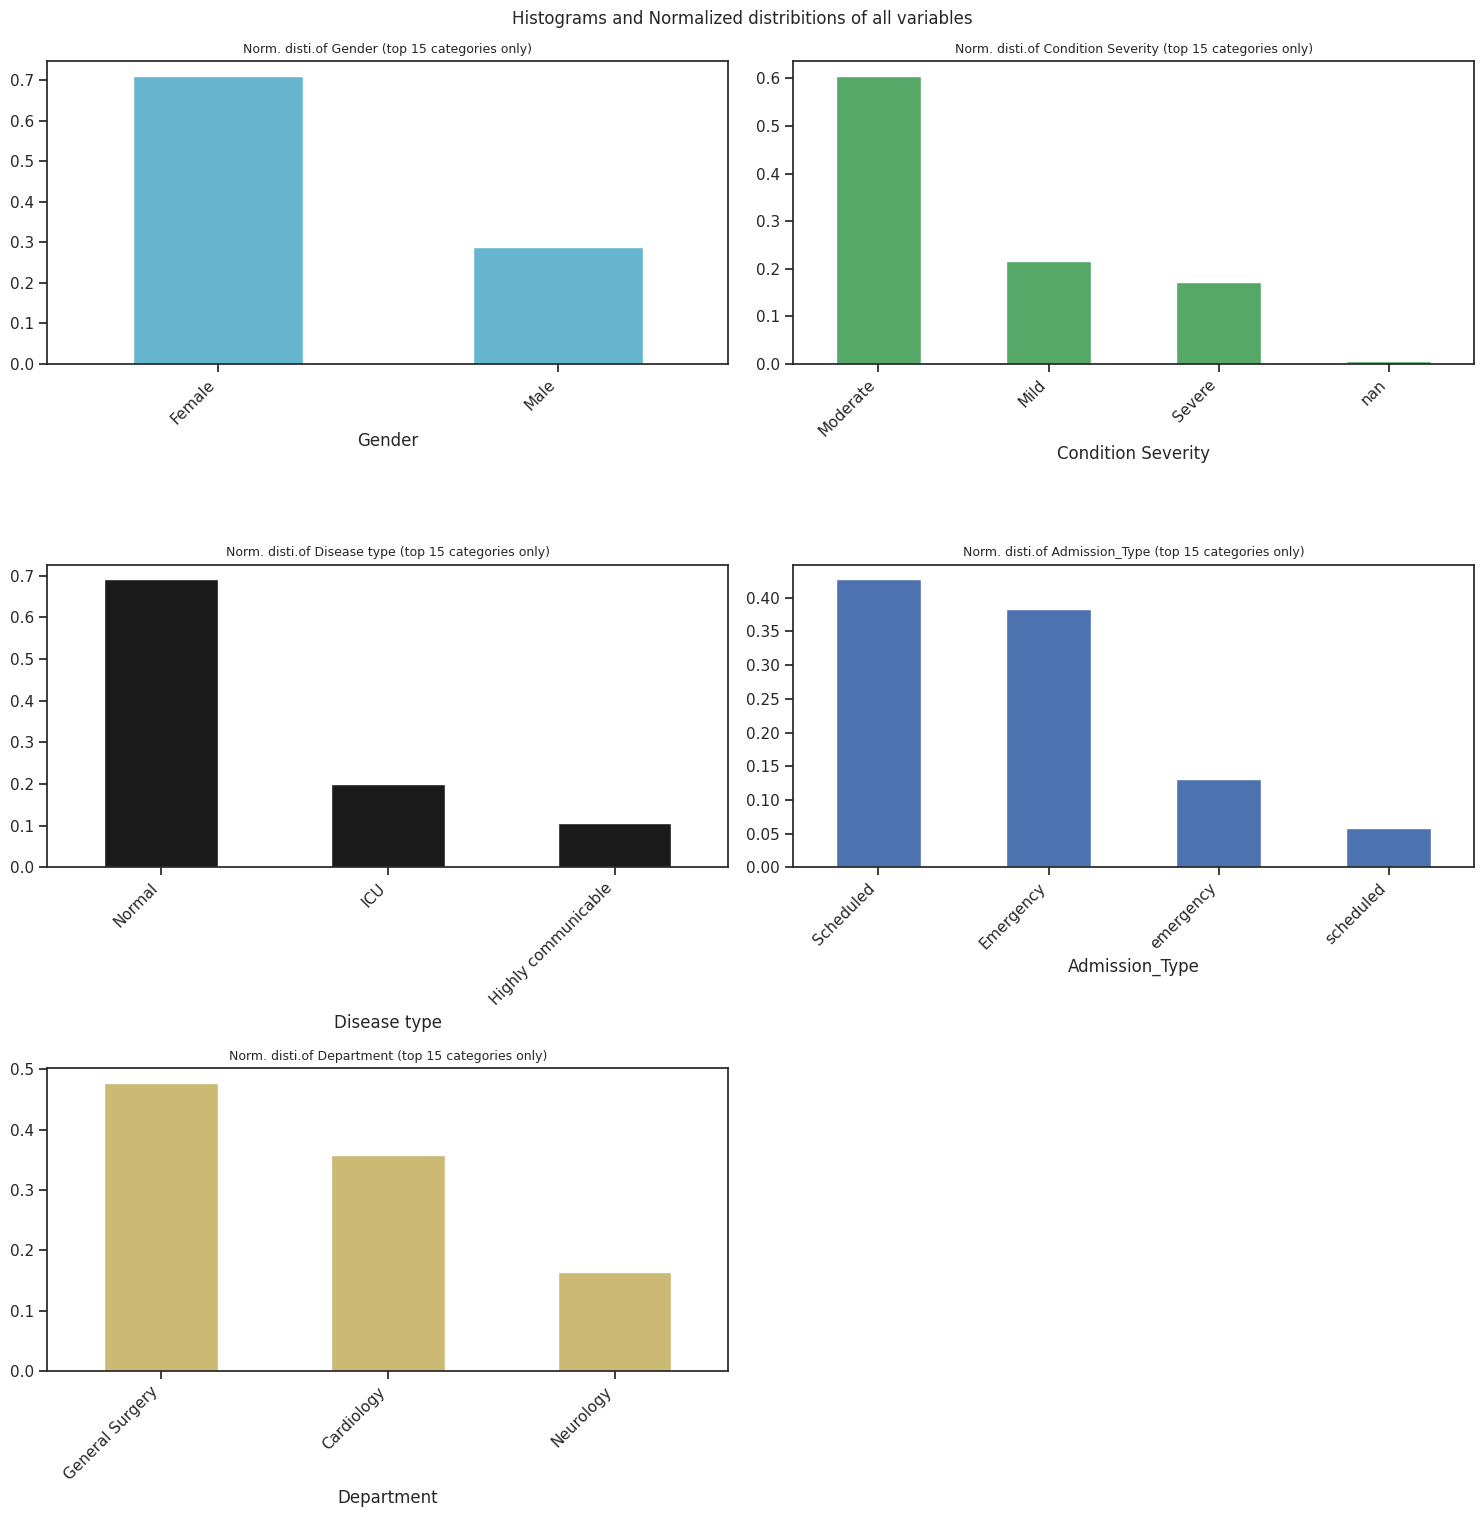

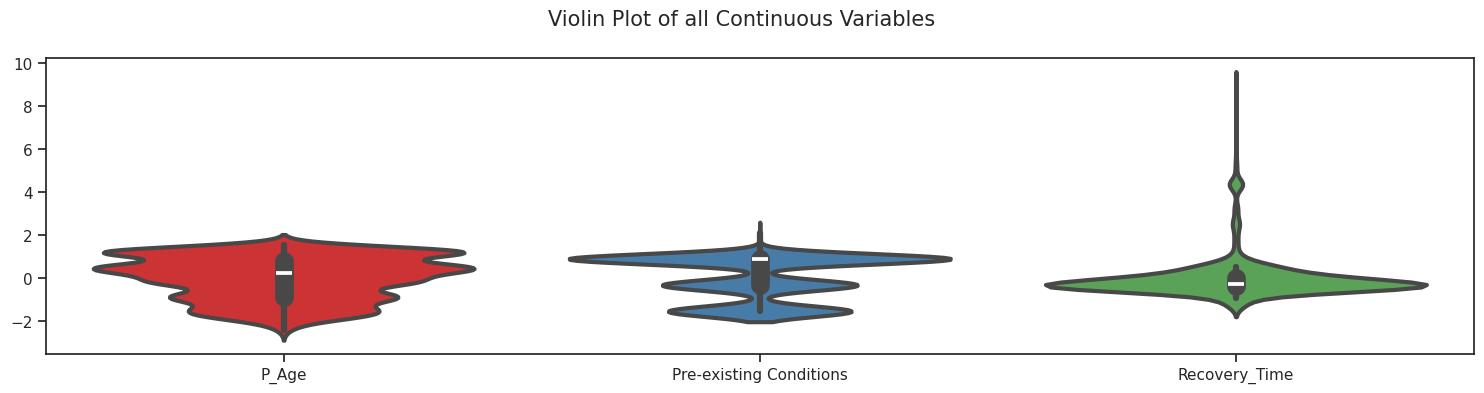

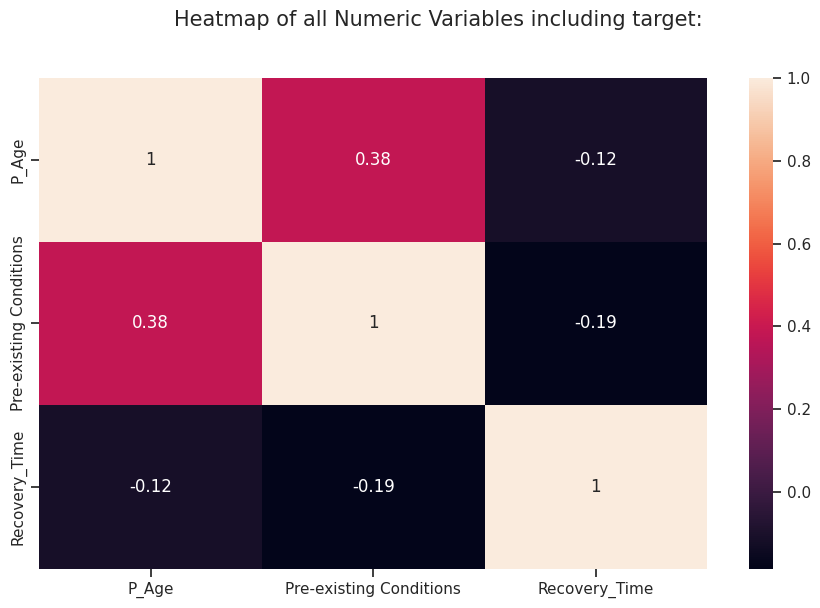

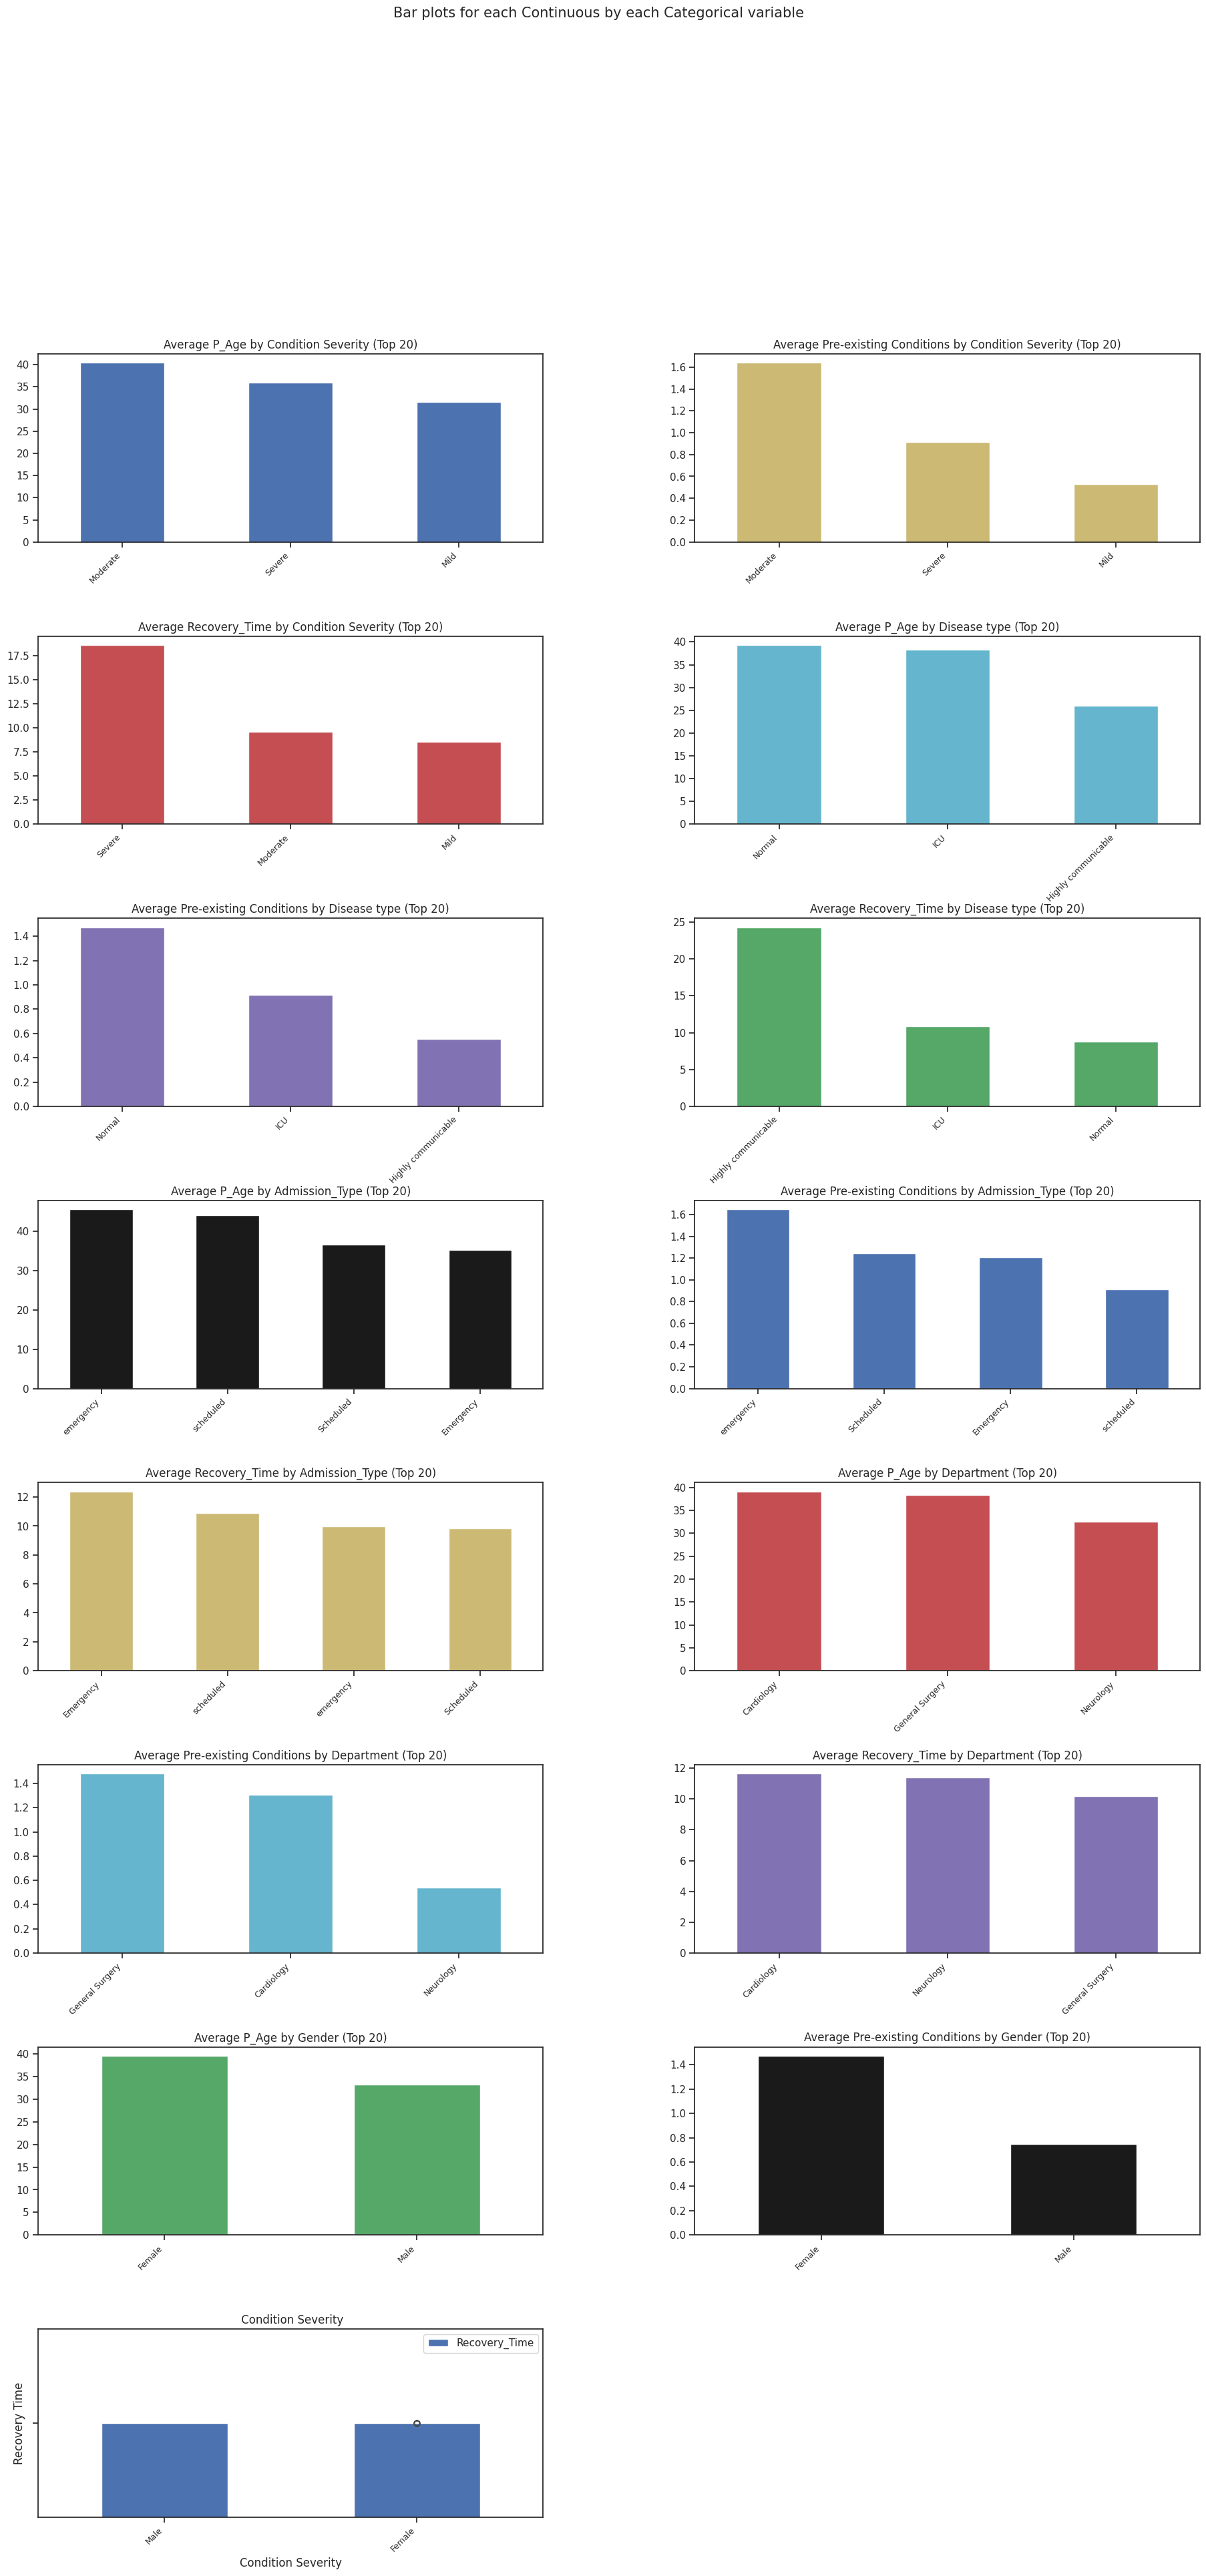

In [66]:
plt.show()